# Warp Algorithm for Regression

This extension implements a version of the Warp algoirthm that detects regressions and adapts to them.

Here, we have used the error_between_line_regression and error_within_line_regression functions in the correction.py file to test the algorithm against both within-line-regression and between-line-regression.

In [1]:
# Reimporting the data 

# open the generated synthetic data file and read it as a python dictionary called data

import json

file = open('synthetic_dataset_with_time.txt', 'r')
text = file.read()
data = json.loads(text)

def reimport_data():
    file = open('synthetic_dataset_with_time.txt', 'r')
    text = file.read()
    data = json.loads(text)

In [2]:
import emip_toolkit as EMTK

# find areas of interest (AOIs) once again
image_path = "./"
image = "synthetic_text.png"
aoi = EMTK.find_aoi(image, image_path, level="sub-line")


# add tokens to AOIs 
file_path = "./"
aois_with_tokens = EMTK.add_tokens_to_AOIs(file_path, image.split(".")[0]+".txt", aoi)
aois_with_tokens.head()


import correction

# find the y coordinate of each line in the text
line_ys = correction.find_lines_Y(aoi)

/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colby/Spring 2023/CS421/CS421-project-cmg/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colby/Spring 2023/CS421/CS421-project-cmg/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colby/Spring 2023/CS421/CS421-project-cmg/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colb

In [3]:
import numpy as np
import drift_algorithms as algo
from tqdm import tqdm

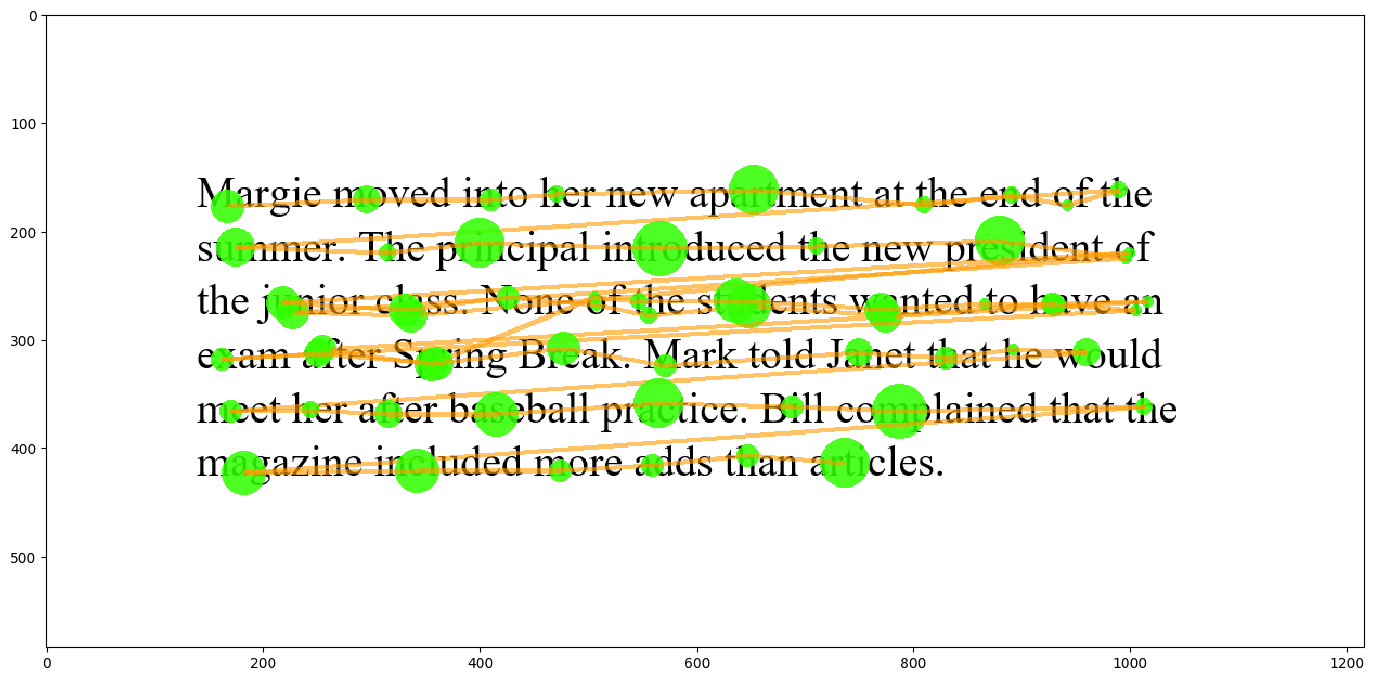

In [4]:
# draw original correct fixations

correction.draw_fixation('synthetic_text.png', data['robot1'].copy())

/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colby/Spring 2023/CS421/CS421-project-cmg/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colby/Spring 2023/CS421/CS421-project-cmg/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colby/Spring 2023/CS421/CS421-project-cmg/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colb

111
111
60
60


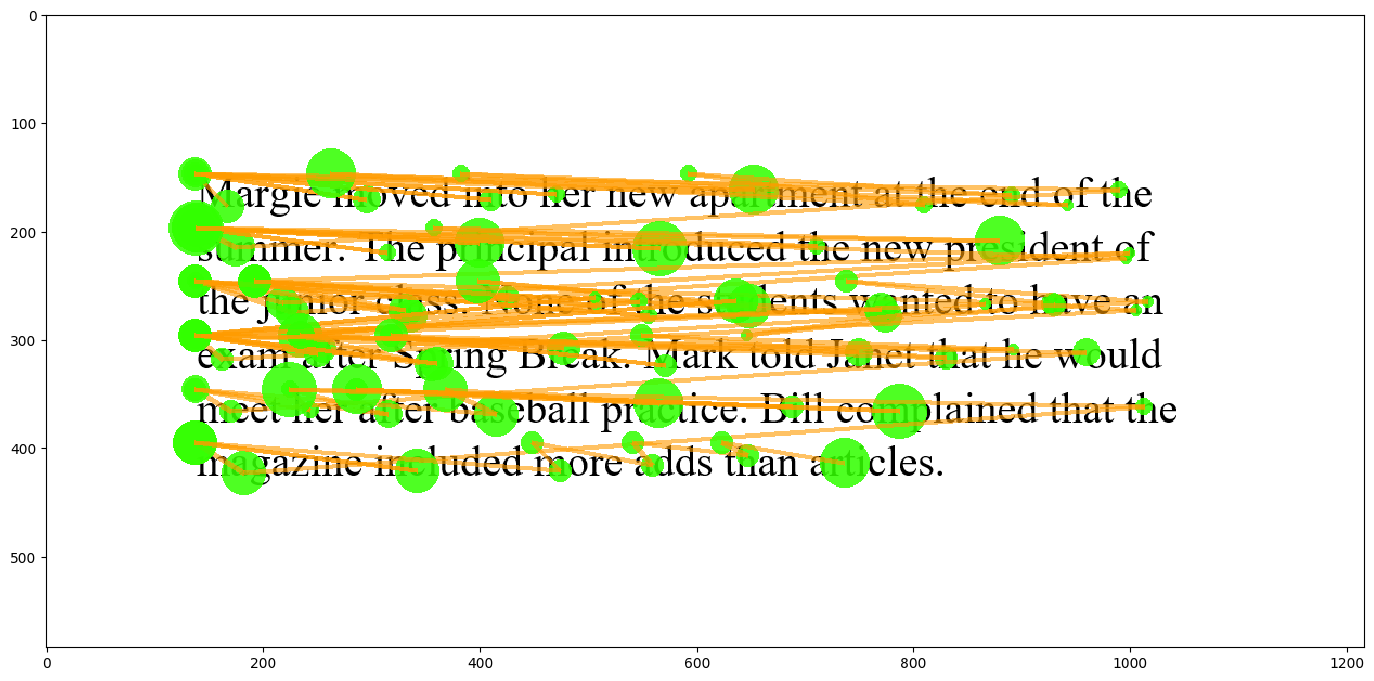

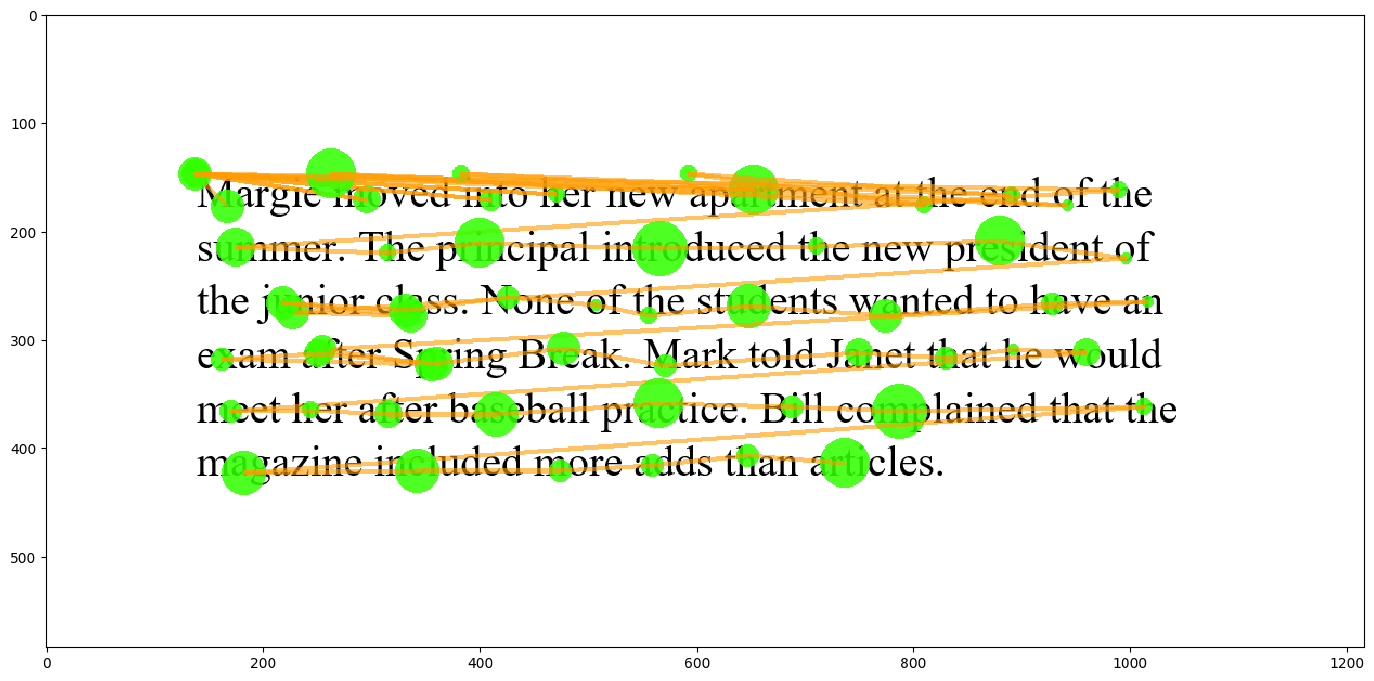

In [5]:
# Filtering out the fixations that are regressed within line

# generate within-line regression over the correct trial
image_path = "./"
image = "synthetic_text.png"

aoi_words = EMTK.find_aoi(image, image_path, level="sub-line")
aoi_lines = EMTK.find_aoi(image, image_path, level="line")

# Creating a sample lsit to store an array of an array of words where each index represents a line
words_sorted_by_line = []

for i in range(len(aoi_lines)):
    words_sorted_by_line.append([])

# Looping through the words and appending them to the correct line
for i in range(len(aoi_words)):
    word_line_number = int(aoi_words.at[i, 'name'].strip().split(' ')[1])
    # Appending the x and y coordinates of the word to the correct line
    words_sorted_by_line[word_line_number-1].append([aoi_words.at[i, 'x'], aoi_words.at[i, 'y']])

error_test, data['robot1'] = correction.error_within_line_regression(1, data['robot1'], words_sorted_by_line, aoi_lines)

# Printing the length of robot1 and error_test to check if the length of the two lists are the same
print(len(data['robot1']))
print(len(error_test))

# draw the trial with added error
correction.draw_fixation('synthetic_text.png', error_test)

# Filter out the fixations that are regressed
filtered_fixations, data['robot1'] = algo.filter_out_regressions(error_test, words_sorted_by_line, aoi_lines, data['robot1'])
# Print the length of the filtered fixations to check if the length of the list is the same as the length of the original list
print(len(filtered_fixations))
print(len(data['robot1']))

# draw the trial without added regression error
correction.draw_fixation('synthetic_text.png', filtered_fixations)

reimport_data()

/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colby/Spring 2023/CS421/CS421-project-cmg/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colby/Spring 2023/CS421/CS421-project-cmg/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colby/Spring 2023/CS421/CS421-project-cmg/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colb

103
103
61
61


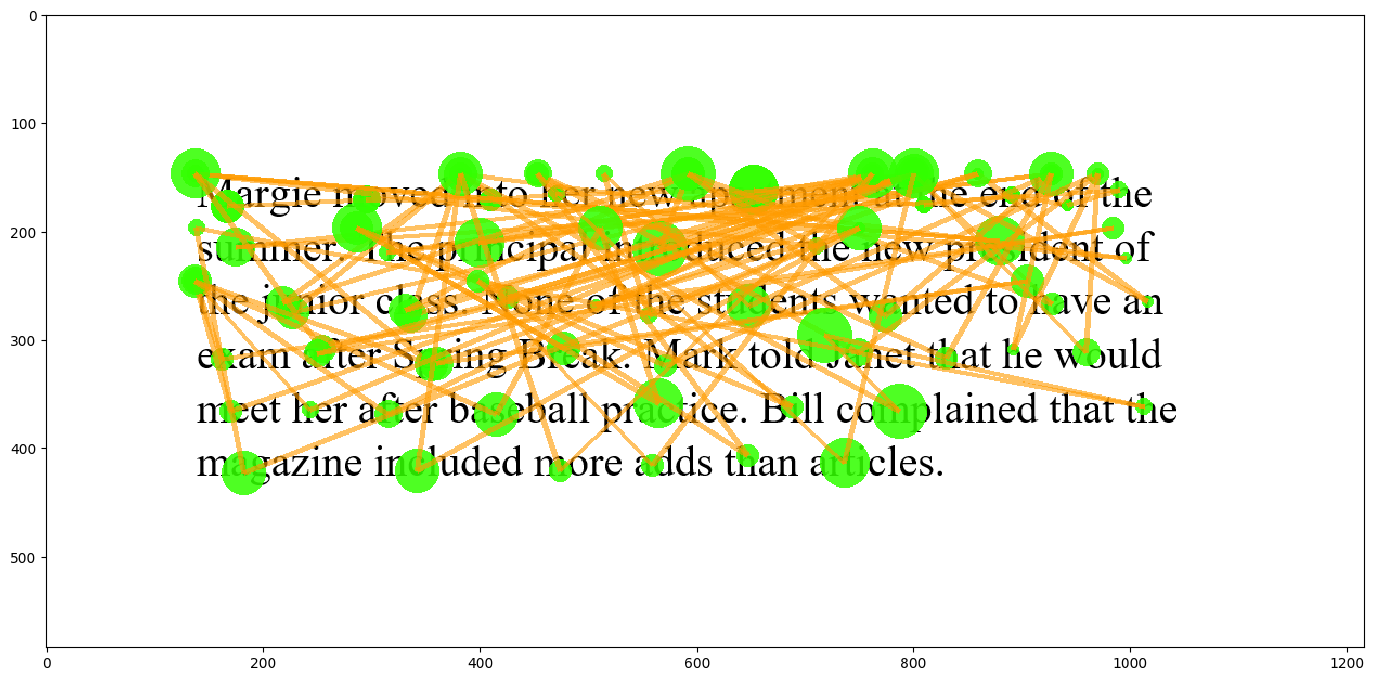

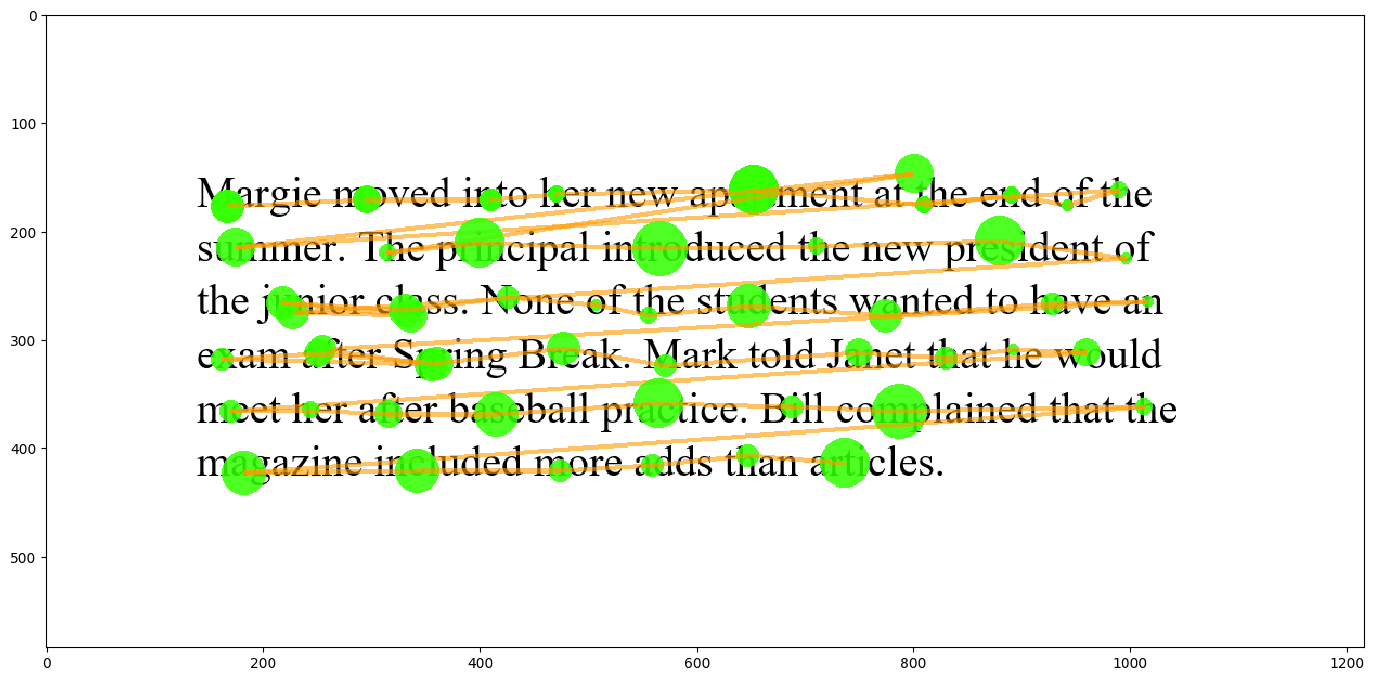

In [6]:
# Example - Filtering out between line regressions

reimport_data()

# generate between line regression error over the correct trial
image_path = "./"
image = "synthetic_text.png"
aoi_words = EMTK.find_aoi(image, image_path, level="sub-line")
aoi_lines = EMTK.find_aoi(image, image_path, level="line")

# Creating a sample lsit to store an array of an array of words where each index represents a line
words_sorted_by_line = []

for i in range(len(aoi_lines)):
    words_sorted_by_line.append([])

# Looping through the words and appending them to the correct line
for i in range(len(aoi_words)):
    word_line_number = int(aoi_words.at[i, 'name'].strip().split(' ')[1])
    # Appending the x and y coordinates of the word to the correct line
    words_sorted_by_line[word_line_number-1].append([aoi_words.at[i, 'x'], aoi_words.at[i, 'y']])

error_test, data['robot1'] = correction.error_between_line_regression(1, data['robot1'].copy(), words_sorted_by_line, aoi_lines)

# Printing the length of robot1 and error_test to check if the length of the two lists are the same
print(len(data['robot1']))
print(len(error_test))

# draw the trial with added error
correction.draw_fixation('synthetic_text.png', error_test)

# Filter out the fixations that are regressed
filtered_fixations, data['robot1'] = algo.filter_out_regressions(error_test, words_sorted_by_line, aoi_lines, data['robot1'])
# Print the length of the filtered fixations to check if the length of the list is the same as the length of the original list
print(len(filtered_fixations))
print(len(data['robot1']))

# draw the trial without added regression error
correction.draw_fixation('synthetic_text.png', filtered_fixations)

reimport_data()

/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colby/Spring 2023/CS421/CS421-project-cmg/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colby/Spring 2023/CS421/CS421-project-cmg/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colby/Spring 2023/CS421/CS421-project-cmg/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colb

116
116
0.7922077922077922
fixations:  77
match_list:  77


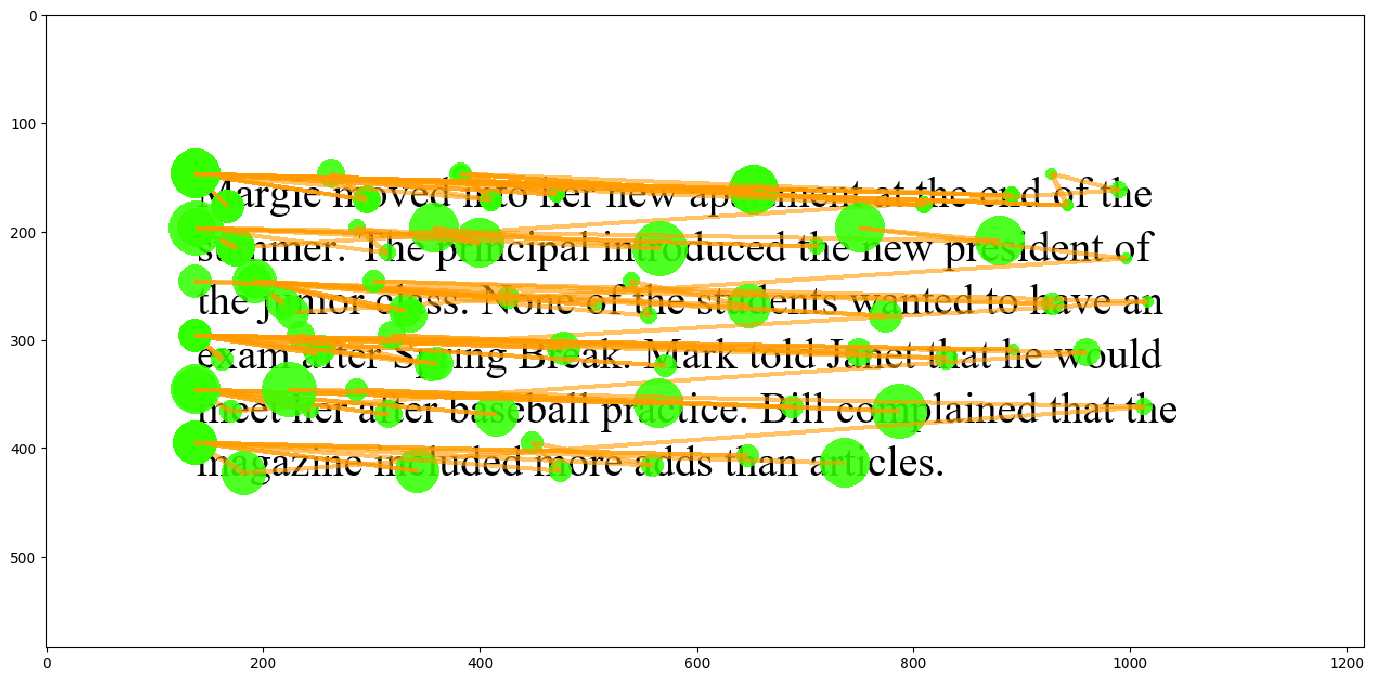

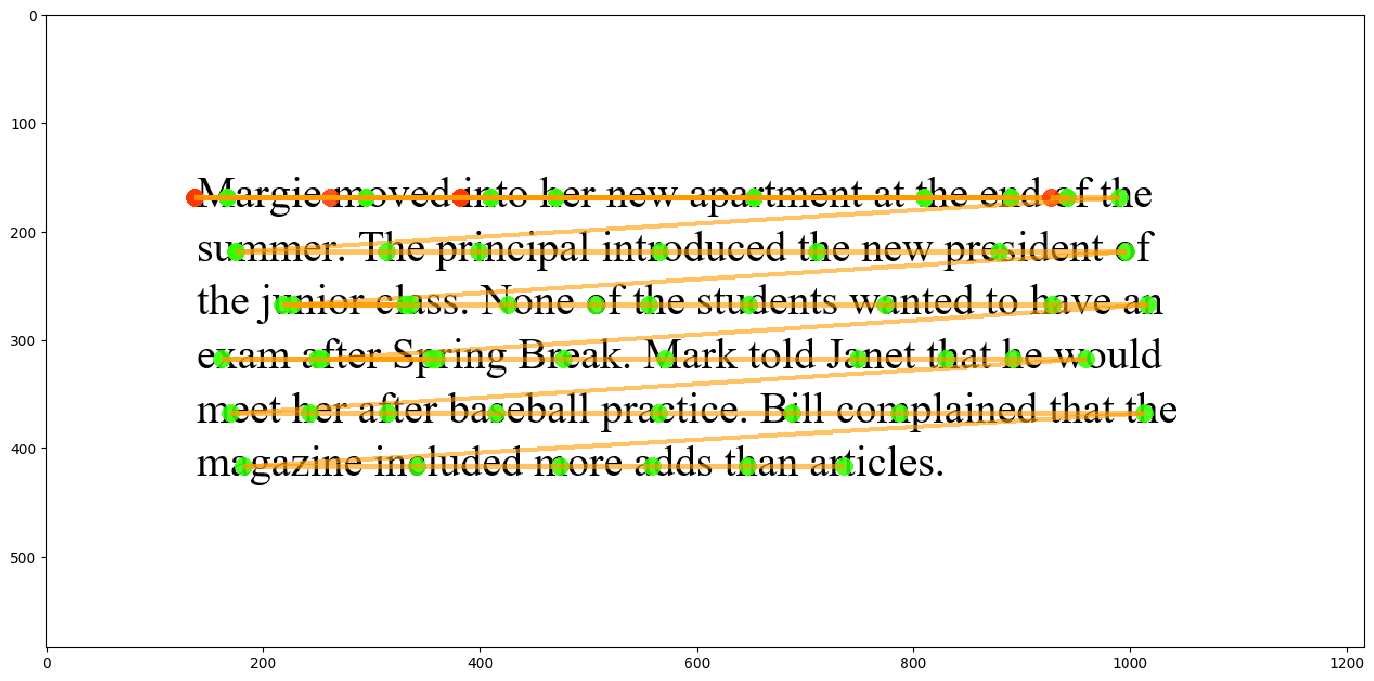

In [7]:
# Warp with regression for within line

# generate within-line regression over the correct trial
image_path = "./"
image = "synthetic_text.png"

aoi_words = EMTK.find_aoi(image, image_path, level="sub-line")
aoi_lines = EMTK.find_aoi(image, image_path, level="line")

# Creating a sample lsit to store an array of an array of words where each index represents a line
words_sorted_by_line = []

for i in range(len(aoi_lines)):
    words_sorted_by_line.append([])

# Looping through the words and appending them to the correct line
for i in range(len(aoi_words)):
    word_line_number = int(aoi_words.at[i, 'name'].strip().split(' ')[1])
    # Appending the x and y coordinates of the word to the correct line
    words_sorted_by_line[word_line_number-1].append([aoi_words.at[i, 'x'], aoi_words.at[i, 'y']])

error_test, data['robot1'] = correction.error_within_line_regression(1, data['robot1'], words_sorted_by_line, aoi_lines)

# Printing the length of robot1 and error_test to check if the length of the two lists are the same
print(len(data['robot1']))
print(len(error_test))

# draw the trial with added error
correction.draw_fixation('synthetic_text.png', error_test)

# find the center of each word, we need this for warp algorithm
word_centers = correction.find_word_centers(aoi)
word_centers = np.array(word_centers.copy(), dtype=int)

# warp correction
# np_array = np.array(error_test.copy(), dtype=int)
# durations = np.delete(np_array, 0, 1)
# durations = np.delete(durations, 0, 1)
# np_array = np.delete(np_array, 2, 1)

# run warp
warp_correction, data['robot1'] = algo.warp_with_regression(error_test.copy(), word_centers, words_sorted_by_line, aoi_lines, data['robot1'].copy())

percentage, match_list = correction.correction_quality(aoi, data['robot1'].copy(), warp_correction)
print(percentage)

# this is a cool function that draws the correction in red if the algorithm made a mistake
correction.draw_correction('synthetic_text.png', warp_correction, match_list)

reimport_data()

/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colby/Spring 2023/CS421/CS421-project-cmg/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colby/Spring 2023/CS421/CS421-project-cmg/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colby/Spring 2023/CS421/CS421-project-cmg/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colb

121
121
0.9871794871794872
fixations:  78
match_list:  78


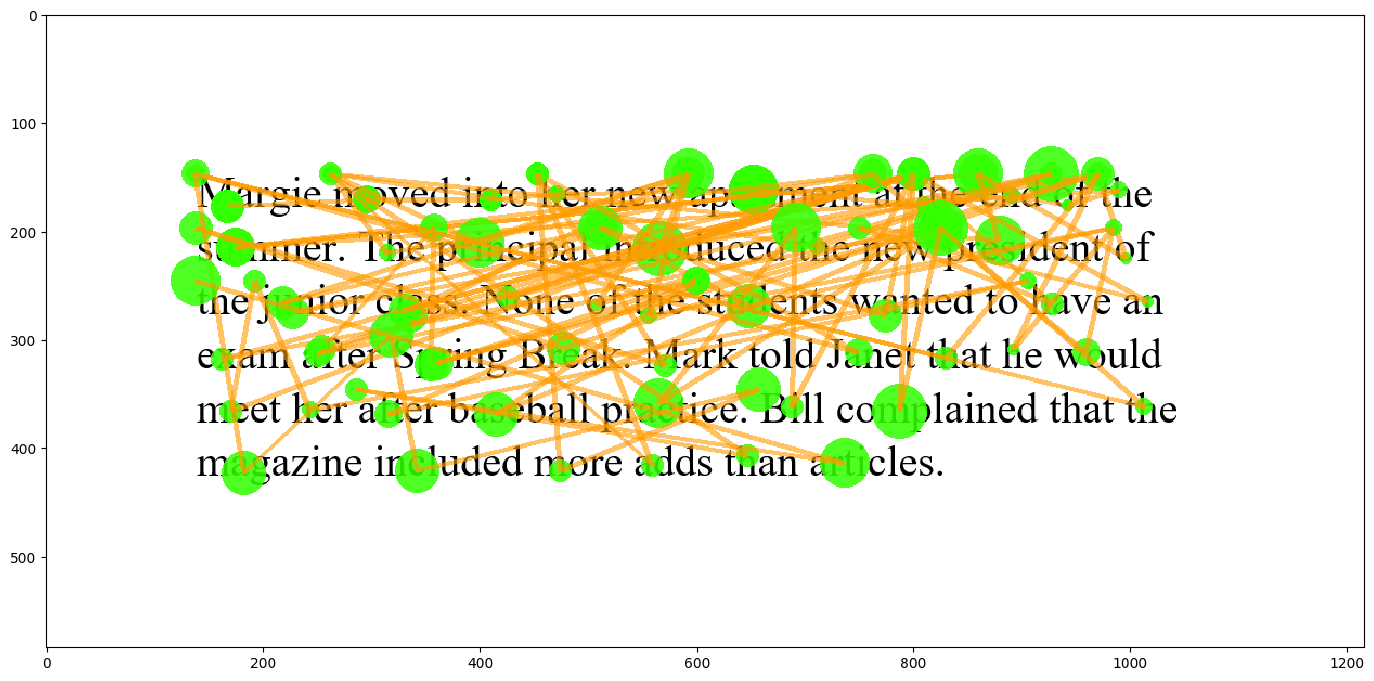

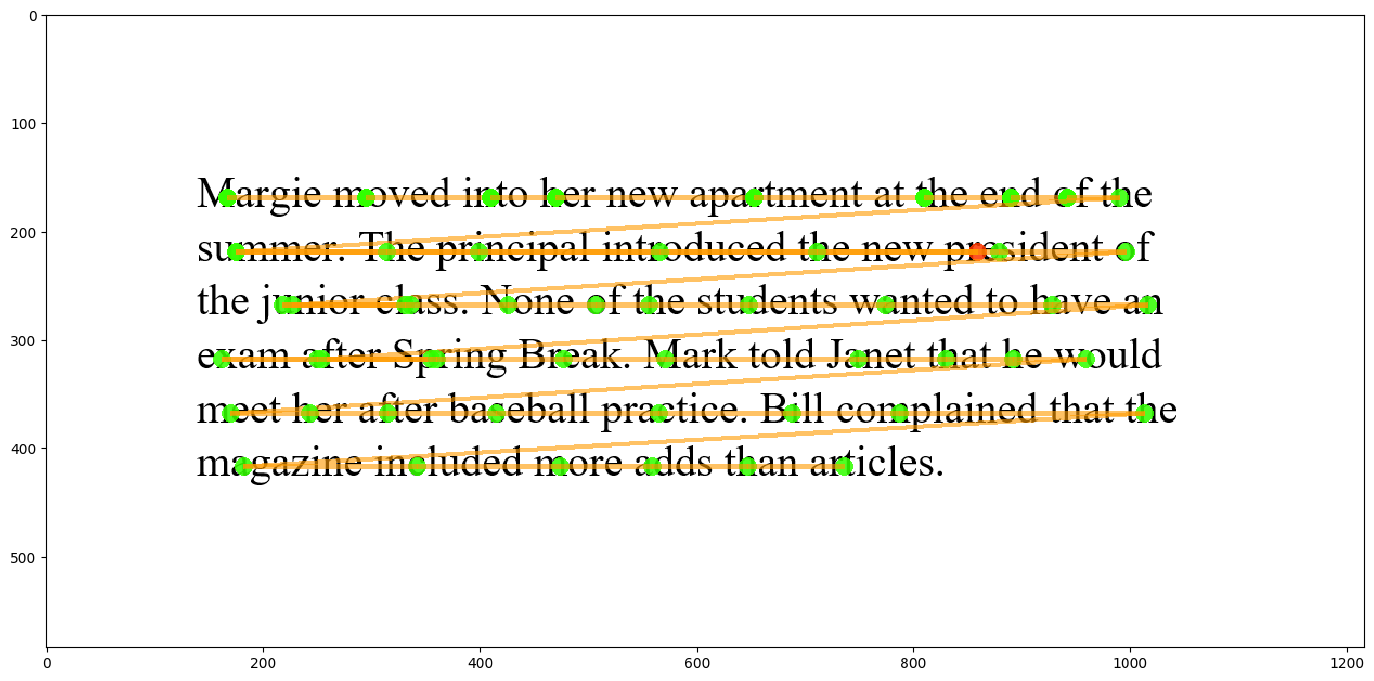

In [8]:
# Warp with regression for between line

# generate within-line regression over the correct trial
image_path = "./"
image = "synthetic_text.png"

aoi_words = EMTK.find_aoi(image, image_path, level="sub-line")
aoi_lines = EMTK.find_aoi(image, image_path, level="line")

# Creating a sample lsit to store an array of an array of words where each index represents a line
words_sorted_by_line = []

for i in range(len(aoi_lines)):
    words_sorted_by_line.append([])

# Looping through the words and appending them to the correct line
for i in range(len(aoi_words)):
    word_line_number = int(aoi_words.at[i, 'name'].strip().split(' ')[1])
    # Appending the x and y coordinates of the word to the correct line
    words_sorted_by_line[word_line_number-1].append([aoi_words.at[i, 'x'], aoi_words.at[i, 'y']])

error_test, data['robot1'] = correction.error_between_line_regression(1, data['robot1'], words_sorted_by_line, aoi_lines)

# Printing the length of robot1 and error_test to check if the length of the two lists are the same
print(len(data['robot1']))
print(len(error_test))

# draw the trial with added error
correction.draw_fixation('synthetic_text.png', error_test)

# find the center of each word, we need this for warp algorithm
word_centers = correction.find_word_centers(aoi)
word_centers = np.array(word_centers.copy(), dtype=int)

# warp correction
# np_array = np.array(error_test.copy(), dtype=int)
# durations = np.delete(np_array, 0, 1)
# durations = np.delete(durations, 0, 1)
# np_array = np.delete(np_array, 2, 1)

# run warp
warp_correction, data['robot1'] = algo.warp_with_regression(error_test.copy(), word_centers, words_sorted_by_line, aoi_lines, data['robot1'].copy())

percentage, match_list = correction.correction_quality(aoi, data['robot1'].copy(), warp_correction)
print(percentage)

# this is a cool function that draws the correction in red if the algorithm made a mistake
correction.draw_correction('synthetic_text.png', warp_correction, match_list)

reimport_data()

## Warp Algorithm (With detection of regression) performance on within-line regression

In [9]:

warp_within_line_results = [[],[],[],[],[],[],[],[],[],[],[]]


import json

file = open('synthetic_dataset_with_time.txt', 'r')
text = file.read()
data = json.loads(text)

word_centers = correction.find_word_centers(aoi)
word_centers = np.array(word_centers.copy(), dtype=int)

duration_word_centers = correction.find_word_centers_and_duration(aois_with_tokens)
duration_word_centers = np.array(duration_word_centers.copy(), dtype=int)

image_path = "./"
image = "synthetic_text.png"
aoi_words = EMTK.find_aoi(image, image_path, level="sub-line")
aoi_lines = EMTK.find_aoi(image, image_path, level="line")

# Creating a sample lsit to store an array of an array of words where each index represents a line
words_sorted_by_line = []

for i in range(len(aoi_lines)):
    words_sorted_by_line.append([])

# Looping through the words and appending them to the correct line
for i in range(len(aoi_words)):
    word_line_number = int(aoi_words.at[i, 'name'].strip().split(' ')[1])
    # Appending the x and y coordinates of the word to the correct line
    words_sorted_by_line[word_line_number-1].append([aoi_words.at[i, 'x'], aoi_words.at[i, 'y']])

# MAKE SURE YOU RUN THIS 100 TIMES, NOT JUST ONE!!!
for robot_index in tqdm(range(100)):

    data_copy = data['robot' + str(robot_index)].copy()

    for error_probability in range(0, 11):

        data['robot' + str(robot_index)] = data_copy.copy()

        # generate within line regression error
        error_test, data['robot' + str(robot_index)] = correction.error_within_line_regression(error_probability/10, data['robot' + str(robot_index)].copy(), words_sorted_by_line, aoi_lines)
        
        # warp correction
        # np_array = np.array(error_test.copy(), dtype=int)
        # durations = np.delete(np_array, 0, 1)
        # durations = np.delete(durations, 0, 1)
        # np_array = np.delete(np_array, 2, 1)

        warp_correction, data['robot' + str(robot_index)] = algo.warp_with_regression(error_test.copy(), word_centers, words_sorted_by_line, aoi_lines, data['robot' + str(robot_index)].copy())
        
        percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), warp_correction)
        warp_within_line_results[error_probability].append(percentage)

        if percentage < 1:
            # correction.draw_correction('synthetic_text.png', warp_correction, match_list)
            print("robot:", robot_index, "    error probability:", error_probability)

/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colby/Spring 2023/CS421/CS421-project-cmg/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colby/Spring 2023/CS421/CS421-project-cmg/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colby/Spring 2023/CS421/CS421-project-cmg/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colb

robot: 0     error probability: 1
robot: 0     error probability: 3
robot: 0     error probability: 4
robot: 0     error probability: 5
robot: 0     error probability: 6
robot: 0     error probability: 7
robot: 0     error probability: 8
robot: 0     error probability: 9


  1%|          | 1/100 [00:00<01:27,  1.13it/s]

robot: 0     error probability: 10
robot: 1     error probability: 3
robot: 1     error probability: 4


  3%|▎         | 3/100 [00:02<01:24,  1.15it/s]

robot: 1     error probability: 5
robot: 1     error probability: 6
robot: 1     error probability: 7
robot: 1     error probability: 8
robot: 1     error probability: 9
robot: 1     error probability: 10
robot: 2     error probability: 2
robot: 2     error probability: 3
robot: 2     error probability: 4
robot: 2     error probability: 5
robot: 2     error probability: 6
robot: 2     error probability: 7
robot: 2     error probability: 8
robot: 2     error probability: 9
robot: 2     error probability: 10
robot: 3     error probability: 3
robot: 3     error probability: 4
robot: 3     error probability: 5
robot: 3     error probability: 6
robot: 3     error probability: 7
robot: 3     error probability: 8


  4%|▍         | 4/100 [00:03<01:39,  1.04s/it]

robot: 3     error probability: 9
robot: 3     error probability: 10
robot: 4     error probability: 2
robot: 4     error probability: 3
robot: 4     error probability: 4
robot: 4     error probability: 5
robot: 4     error probability: 6


  6%|▌         | 6/100 [00:05<01:28,  1.06it/s]

robot: 4     error probability: 7
robot: 4     error probability: 8
robot: 4     error probability: 9
robot: 4     error probability: 10
robot: 5     error probability: 1
robot: 5     error probability: 2
robot: 5     error probability: 3
robot: 5     error probability: 4
robot: 5     error probability: 5
robot: 5     error probability: 6
robot: 5     error probability: 7
robot: 5     error probability: 8
robot: 5     error probability: 9
robot: 5     error probability: 10
robot: 6     error probability: 1
robot: 6     error probability: 3
robot: 6     error probability: 4
robot: 6     error probability: 5
robot: 6     error probability: 6
robot: 6     error probability: 7
robot: 6     error probability: 8
robot: 6     error probability: 9


  7%|▋         | 7/100 [00:06<01:30,  1.03it/s]

robot: 6     error probability: 10
robot: 7     error probability: 2


  9%|▉         | 9/100 [00:08<01:20,  1.12it/s]

robot: 7     error probability: 3
robot: 7     error probability: 4
robot: 7     error probability: 5
robot: 7     error probability: 6
robot: 7     error probability: 7
robot: 7     error probability: 8
robot: 7     error probability: 9
robot: 7     error probability: 10
robot: 8     error probability: 1
robot: 8     error probability: 2
robot: 8     error probability: 3
robot: 8     error probability: 4
robot: 8     error probability: 5
robot: 8     error probability: 6
robot: 8     error probability: 7
robot: 8     error probability: 8
robot: 8     error probability: 9
robot: 8     error probability: 10
robot: 9     error probability: 2
robot: 9     error probability: 3
robot: 9     error probability: 4
robot: 9     error probability: 5
robot: 9     error probability: 6
robot: 9     error probability: 7


 11%|█         | 11/100 [00:10<01:19,  1.11it/s]

robot: 9     error probability: 8
robot: 9     error probability: 9
robot: 9     error probability: 10
robot: 10     error probability: 1
robot: 10     error probability: 3
robot: 10     error probability: 4
robot: 10     error probability: 5
robot: 10     error probability: 6
robot: 10     error probability: 7
robot: 10     error probability: 8
robot: 10     error probability: 9
robot: 10     error probability: 10
robot: 11     error probability: 2
robot: 11     error probability: 3
robot: 11     error probability: 4
robot: 11     error probability: 5
robot: 11     error probability: 6
robot: 11     error probability: 7
robot: 11     error probability: 8


 12%|█▏        | 12/100 [00:11<01:20,  1.10it/s]

robot: 11     error probability: 9
robot: 11     error probability: 10
robot: 12     error probability: 0
robot: 12     error probability: 1
robot: 12     error probability: 2
robot: 12     error probability: 3
robot: 12     error probability: 4
robot: 12     error probability: 5
robot: 12     error probability: 6
robot: 12     error probability: 7
robot: 12     error probability: 8
robot: 12     error probability: 9
robot: 12     error probability: 10


 13%|█▎        | 13/100 [00:12<01:23,  1.04it/s]

robot: 13     error probability: 1
robot: 13     error probability: 2
robot: 13     error probability: 3
robot: 13     error probability: 4
robot: 13     error probability: 5
robot: 13     error probability: 6
robot: 13     error probability: 7


 14%|█▍        | 14/100 [00:13<01:28,  1.03s/it]

robot: 13     error probability: 8
robot: 13     error probability: 9
robot: 13     error probability: 10
robot: 14     error probability: 2
robot: 14     error probability: 3
robot: 14     error probability: 4
robot: 14     error probability: 5
robot: 14     error probability: 6
robot: 14     error probability: 7


 15%|█▌        | 15/100 [00:14<01:25,  1.00s/it]

robot: 14     error probability: 8
robot: 14     error probability: 9
robot: 14     error probability: 10
robot: 15     error probability: 1
robot: 15     error probability: 2
robot: 15     error probability: 3
robot: 15     error probability: 4
robot: 15     error probability: 5
robot: 15     error probability: 6
robot: 15     error probability: 7
robot: 15     error probability: 8
robot: 15     error probability: 9
robot: 15     error probability: 10


 16%|█▌        | 16/100 [00:15<01:18,  1.07it/s]

robot: 16     error probability: 3
robot: 16     error probability: 4
robot: 16     error probability: 5
robot: 16     error probability: 6


 17%|█▋        | 17/100 [00:16<01:18,  1.06it/s]

robot: 16     error probability: 7
robot: 16     error probability: 8
robot: 16     error probability: 9
robot: 16     error probability: 10
robot: 17     error probability: 1
robot: 17     error probability: 2
robot: 17     error probability: 3
robot: 17     error probability: 4
robot: 17     error probability: 5
robot: 17     error probability: 6


 18%|█▊        | 18/100 [00:17<01:19,  1.03it/s]

robot: 17     error probability: 7
robot: 17     error probability: 8
robot: 17     error probability: 9
robot: 17     error probability: 10
robot: 18     error probability: 2
robot: 18     error probability: 3
robot: 18     error probability: 4
robot: 18     error probability: 5
robot: 18     error probability: 6
robot: 18     error probability: 7
robot: 18     error probability: 8
robot: 18     error probability: 9
robot: 18     error probability: 10


 19%|█▉        | 19/100 [00:17<01:14,  1.09it/s]

robot: 19     error probability: 3
robot: 19     error probability: 4
robot: 19     error probability: 5
robot: 19     error probability: 6


 21%|██        | 21/100 [00:19<01:13,  1.08it/s]

robot: 19     error probability: 7
robot: 19     error probability: 8
robot: 19     error probability: 9
robot: 19     error probability: 10
robot: 20     error probability: 1
robot: 20     error probability: 3
robot: 20     error probability: 4
robot: 20     error probability: 5
robot: 20     error probability: 6
robot: 20     error probability: 7
robot: 20     error probability: 8
robot: 20     error probability: 9
robot: 20     error probability: 10
robot: 21     error probability: 1
robot: 21     error probability: 2
robot: 21     error probability: 3
robot: 21     error probability: 4
robot: 21     error probability: 5
robot: 21     error probability: 6
robot: 21     error probability: 7
robot: 21     error probability: 8
robot: 21     error probability: 9
robot: 21     error probability: 10


 22%|██▏       | 22/100 [00:20<01:10,  1.11it/s]

robot: 22     error probability: 1
robot: 22     error probability: 2
robot: 22     error probability: 3
robot: 22     error probability: 4
robot: 22     error probability: 5
robot: 22     error probability: 6
robot: 22     error probability: 7
robot: 22     error probability: 8
robot: 22     error probability: 9


 23%|██▎       | 23/100 [00:21<01:15,  1.02it/s]

robot: 22     error probability: 10
robot: 23     error probability: 1
robot: 23     error probability: 2


 24%|██▍       | 24/100 [00:22<01:13,  1.03it/s]

robot: 23     error probability: 3
robot: 23     error probability: 4
robot: 23     error probability: 5
robot: 23     error probability: 6
robot: 23     error probability: 7
robot: 23     error probability: 8
robot: 23     error probability: 9
robot: 23     error probability: 10
robot: 24     error probability: 2
robot: 24     error probability: 3
robot: 24     error probability: 4
robot: 24     error probability: 5
robot: 24     error probability: 6
robot: 24     error probability: 7
robot: 24     error probability: 8
robot: 24     error probability: 9
robot: 24     error probability: 10


 27%|██▋       | 27/100 [00:25<01:02,  1.17it/s]

robot: 25     error probability: 3
robot: 25     error probability: 4
robot: 25     error probability: 5
robot: 25     error probability: 6
robot: 25     error probability: 7
robot: 25     error probability: 8
robot: 25     error probability: 9
robot: 25     error probability: 10
robot: 26     error probability: 1
robot: 26     error probability: 2
robot: 26     error probability: 3
robot: 26     error probability: 4
robot: 26     error probability: 5
robot: 26     error probability: 6
robot: 26     error probability: 7
robot: 26     error probability: 8
robot: 26     error probability: 9
robot: 26     error probability: 10


 28%|██▊       | 28/100 [00:26<01:05,  1.10it/s]

robot: 27     error probability: 1
robot: 27     error probability: 2
robot: 27     error probability: 3
robot: 27     error probability: 4
robot: 27     error probability: 5
robot: 27     error probability: 6
robot: 27     error probability: 7
robot: 27     error probability: 8
robot: 27     error probability: 9
robot: 27     error probability: 10
robot: 28     error probability: 0
robot: 28     error probability: 1
robot: 28     error probability: 2
robot: 28     error probability: 3
robot: 28     error probability: 4
robot: 28     error probability: 5
robot: 28     error probability: 6
robot: 28     error probability: 7
robot: 28     error probability: 8
robot: 28     error probability: 9


 29%|██▉       | 29/100 [00:27<01:04,  1.10it/s]

robot: 28     error probability: 10
robot: 29     error probability: 2
robot: 29     error probability: 3
robot: 29     error probability: 4
robot: 29     error probability: 5
robot: 29     error probability: 6
robot: 29     error probability: 7
robot: 29     error probability: 8
robot: 29     error probability: 9


 30%|███       | 30/100 [00:27<01:03,  1.10it/s]

robot: 29     error probability: 10
robot: 30     error probability: 2
robot: 30     error probability: 3
robot: 30     error probability: 4
robot: 30     error probability: 5


 31%|███       | 31/100 [00:28<01:00,  1.14it/s]

robot: 30     error probability: 6
robot: 30     error probability: 7
robot: 30     error probability: 8
robot: 30     error probability: 9
robot: 30     error probability: 10
robot: 31     error probability: 1
robot: 31     error probability: 2
robot: 31     error probability: 3
robot: 31     error probability: 4
robot: 31     error probability: 5
robot: 31     error probability: 6
robot: 31     error probability: 7
robot: 31     error probability: 8
robot: 31     error probability: 9
robot: 31     error probability: 10


 32%|███▏      | 32/100 [00:29<00:57,  1.18it/s]

robot: 32     error probability: 1
robot: 32     error probability: 2
robot: 32     error probability: 3
robot: 32     error probability: 4
robot: 32     error probability: 5
robot: 32     error probability: 6
robot: 32     error probability: 7


 34%|███▍      | 34/100 [00:31<00:56,  1.17it/s]

robot: 32     error probability: 8
robot: 32     error probability: 9
robot: 32     error probability: 10
robot: 33     error probability: 1
robot: 33     error probability: 3
robot: 33     error probability: 4
robot: 33     error probability: 5
robot: 33     error probability: 6
robot: 33     error probability: 7
robot: 33     error probability: 8
robot: 33     error probability: 9
robot: 33     error probability: 10
robot: 34     error probability: 2
robot: 34     error probability: 3
robot: 34     error probability: 4
robot: 34     error probability: 5
robot: 34     error probability: 6
robot: 34     error probability: 7
robot: 34     error probability: 8
robot: 34     error probability: 9


 35%|███▌      | 35/100 [00:32<01:02,  1.04it/s]

robot: 34     error probability: 10
robot: 35     error probability: 1
robot: 35     error probability: 2
robot: 35     error probability: 3
robot: 35     error probability: 4
robot: 35     error probability: 5
robot: 35     error probability: 6
robot: 35     error probability: 7
robot: 35     error probability: 8
robot: 35     error probability: 9
robot: 35     error probability: 10


 36%|███▌      | 36/100 [00:33<01:00,  1.05it/s]

robot: 36     error probability: 1
robot: 36     error probability: 2
robot: 36     error probability: 3
robot: 36     error probability: 4
robot: 36     error probability: 5
robot: 36     error probability: 6
robot: 36     error probability: 7
robot: 36     error probability: 8
robot: 36     error probability: 9


 37%|███▋      | 37/100 [00:34<00:57,  1.10it/s]

robot: 36     error probability: 10
robot: 37     error probability: 0
robot: 37     error probability: 1
robot: 37     error probability: 2
robot: 37     error probability: 3


 38%|███▊      | 38/100 [00:35<00:58,  1.06it/s]

robot: 37     error probability: 4
robot: 37     error probability: 5
robot: 37     error probability: 6
robot: 37     error probability: 7
robot: 37     error probability: 8
robot: 37     error probability: 9
robot: 37     error probability: 10
robot: 38     error probability: 1
robot: 38     error probability: 3
robot: 38     error probability: 4
robot: 38     error probability: 5
robot: 38     error probability: 6
robot: 38     error probability: 7
robot: 38     error probability: 8
robot: 38     error probability: 9
robot: 38     error probability: 10


 39%|███▉      | 39/100 [00:36<00:55,  1.09it/s]

robot: 39     error probability: 2
robot: 39     error probability: 3
robot: 39     error probability: 4
robot: 39     error probability: 5
robot: 39     error probability: 6
robot: 39     error probability: 7
robot: 39     error probability: 8


 40%|████      | 40/100 [00:37<00:56,  1.06it/s]

robot: 39     error probability: 9
robot: 39     error probability: 10
robot: 40     error probability: 1
robot: 40     error probability: 2
robot: 40     error probability: 3
robot: 40     error probability: 4
robot: 40     error probability: 5
robot: 40     error probability: 6
robot: 40     error probability: 7
robot: 40     error probability: 8
robot: 40     error probability: 9


 41%|████      | 41/100 [00:38<00:55,  1.07it/s]

robot: 40     error probability: 10
robot: 41     error probability: 2
robot: 41     error probability: 4
robot: 41     error probability: 5
robot: 41     error probability: 6


 42%|████▏     | 42/100 [00:38<00:53,  1.08it/s]

robot: 41     error probability: 7
robot: 41     error probability: 8
robot: 41     error probability: 9
robot: 41     error probability: 10
robot: 42     error probability: 2
robot: 42     error probability: 3
robot: 42     error probability: 4
robot: 42     error probability: 5


 43%|████▎     | 43/100 [00:39<00:52,  1.09it/s]

robot: 42     error probability: 6
robot: 42     error probability: 7
robot: 42     error probability: 8
robot: 42     error probability: 9
robot: 42     error probability: 10
robot: 43     error probability: 1
robot: 43     error probability: 2
robot: 43     error probability: 3
robot: 43     error probability: 4
robot: 43     error probability: 5
robot: 43     error probability: 6
robot: 43     error probability: 7


 45%|████▌     | 45/100 [00:41<00:48,  1.14it/s]

robot: 43     error probability: 8
robot: 43     error probability: 9
robot: 43     error probability: 10
robot: 44     error probability: 1
robot: 44     error probability: 2
robot: 44     error probability: 3
robot: 44     error probability: 4
robot: 44     error probability: 5
robot: 44     error probability: 6
robot: 44     error probability: 7
robot: 44     error probability: 8
robot: 44     error probability: 9
robot: 44     error probability: 10


 46%|████▌     | 46/100 [00:42<00:47,  1.13it/s]

robot: 45     error probability: 2
robot: 45     error probability: 3
robot: 45     error probability: 4
robot: 45     error probability: 5
robot: 45     error probability: 6
robot: 45     error probability: 7
robot: 45     error probability: 8
robot: 45     error probability: 9
robot: 45     error probability: 10
robot: 46     error probability: 1
robot: 46     error probability: 2
robot: 46     error probability: 3
robot: 46     error probability: 4
robot: 46     error probability: 5
robot: 46     error probability: 6


 47%|████▋     | 47/100 [00:43<00:46,  1.13it/s]

robot: 46     error probability: 7
robot: 46     error probability: 8
robot: 46     error probability: 9
robot: 46     error probability: 10
robot: 47     error probability: 1
robot: 47     error probability: 2
robot: 47     error probability: 3
robot: 47     error probability: 4
robot: 47     error probability: 5
robot: 47     error probability: 6
robot: 47     error probability: 7
robot: 47     error probability: 8
robot: 47     error probability: 9
robot: 47     error probability: 10


 48%|████▊     | 48/100 [00:44<00:47,  1.10it/s]

robot: 48     error probability: 1
robot: 48     error probability: 2
robot: 48     error probability: 3
robot: 48     error probability: 4
robot: 48     error probability: 5
robot: 48     error probability: 6
robot: 48     error probability: 7
robot: 48     error probability: 8


 50%|█████     | 50/100 [00:45<00:41,  1.19it/s]

robot: 48     error probability: 9
robot: 48     error probability: 10
robot: 49     error probability: 1
robot: 49     error probability: 2
robot: 49     error probability: 3
robot: 49     error probability: 4
robot: 49     error probability: 5
robot: 49     error probability: 6
robot: 49     error probability: 7
robot: 49     error probability: 8
robot: 49     error probability: 9
robot: 49     error probability: 10


 51%|█████     | 51/100 [00:46<00:41,  1.19it/s]

robot: 50     error probability: 1
robot: 50     error probability: 2
robot: 50     error probability: 3
robot: 50     error probability: 4
robot: 50     error probability: 5
robot: 50     error probability: 6
robot: 50     error probability: 7
robot: 50     error probability: 8
robot: 50     error probability: 9
robot: 50     error probability: 10
robot: 51     error probability: 2
robot: 51     error probability: 3


 53%|█████▎    | 53/100 [00:48<00:39,  1.20it/s]

robot: 51     error probability: 4
robot: 51     error probability: 5
robot: 51     error probability: 6
robot: 51     error probability: 7
robot: 51     error probability: 8
robot: 51     error probability: 9
robot: 51     error probability: 10
robot: 52     error probability: 1
robot: 52     error probability: 2
robot: 52     error probability: 3
robot: 52     error probability: 4
robot: 52     error probability: 5
robot: 52     error probability: 6
robot: 52     error probability: 7
robot: 52     error probability: 8
robot: 52     error probability: 9
robot: 52     error probability: 10
robot: 53     error probability: 1
robot: 53     error probability: 2
robot: 53     error probability: 3
robot: 53     error probability: 4
robot: 53     error probability: 5
robot: 53     error probability: 6
robot: 53     error probability: 7
robot: 53     error probability: 8
robot: 53     error probability: 9
robot: 53     error probability: 10


 54%|█████▍    | 54/100 [00:49<00:40,  1.13it/s]

robot: 54     error probability: 2
robot: 54     error probability: 3
robot: 54     error probability: 4
robot: 54     error probability: 5
robot: 54     error probability: 6
robot: 54     error probability: 7


 55%|█████▌    | 55/100 [00:50<00:40,  1.11it/s]

robot: 54     error probability: 8
robot: 54     error probability: 9
robot: 54     error probability: 10
robot: 55     error probability: 1
robot: 55     error probability: 2
robot: 55     error probability: 3
robot: 55     error probability: 4
robot: 55     error probability: 5
robot: 55     error probability: 6
robot: 55     error probability: 7
robot: 55     error probability: 8
robot: 55     error probability: 9
robot: 55     error probability: 10


 57%|█████▋    | 57/100 [00:51<00:37,  1.16it/s]

robot: 56     error probability: 1
robot: 56     error probability: 2
robot: 56     error probability: 3
robot: 56     error probability: 4
robot: 56     error probability: 5
robot: 56     error probability: 6
robot: 56     error probability: 7
robot: 56     error probability: 8
robot: 56     error probability: 9
robot: 56     error probability: 10
robot: 57     error probability: 4
robot: 57     error probability: 5
robot: 57     error probability: 6
robot: 57     error probability: 7
robot: 57     error probability: 8
robot: 57     error probability: 9
robot: 57     error probability: 10


 58%|█████▊    | 58/100 [00:52<00:34,  1.22it/s]

robot: 58     error probability: 1
robot: 58     error probability: 2
robot: 58     error probability: 3
robot: 58     error probability: 4
robot: 58     error probability: 5


 59%|█████▉    | 59/100 [00:53<00:35,  1.16it/s]

robot: 58     error probability: 6
robot: 58     error probability: 7
robot: 58     error probability: 8
robot: 58     error probability: 9
robot: 58     error probability: 10
robot: 59     error probability: 2
robot: 59     error probability: 3
robot: 59     error probability: 4
robot: 59     error probability: 5
robot: 59     error probability: 6
robot: 59     error probability: 7
robot: 59     error probability: 8
robot: 59     error probability: 9
robot: 59     error probability: 10


 60%|██████    | 60/100 [00:54<00:35,  1.14it/s]

robot: 60     error probability: 1
robot: 60     error probability: 2
robot: 60     error probability: 3
robot: 60     error probability: 4
robot: 60     error probability: 5
robot: 60     error probability: 6
robot: 60     error probability: 7
robot: 60     error probability: 8
robot: 60     error probability: 9


 61%|██████    | 61/100 [00:55<00:34,  1.14it/s]

robot: 60     error probability: 10
robot: 61     error probability: 2
robot: 61     error probability: 3
robot: 61     error probability: 4
robot: 61     error probability: 5
robot: 61     error probability: 6
robot: 61     error probability: 7
robot: 61     error probability: 8


 62%|██████▏   | 62/100 [00:56<00:36,  1.04it/s]

robot: 61     error probability: 9
robot: 61     error probability: 10
robot: 62     error probability: 1
robot: 62     error probability: 2
robot: 62     error probability: 3
robot: 62     error probability: 4


 63%|██████▎   | 63/100 [00:57<00:37,  1.01s/it]

robot: 62     error probability: 5
robot: 62     error probability: 6
robot: 62     error probability: 7
robot: 62     error probability: 8
robot: 62     error probability: 9
robot: 62     error probability: 10
robot: 63     error probability: 1
robot: 63     error probability: 2
robot: 63     error probability: 3
robot: 63     error probability: 4
robot: 63     error probability: 5
robot: 63     error probability: 6
robot: 63     error probability: 7
robot: 63     error probability: 8


 64%|██████▍   | 64/100 [00:58<00:35,  1.01it/s]

robot: 63     error probability: 9
robot: 63     error probability: 10
robot: 64     error probability: 1


 65%|██████▌   | 65/100 [00:59<00:34,  1.03it/s]

robot: 64     error probability: 3
robot: 64     error probability: 4
robot: 64     error probability: 5
robot: 64     error probability: 6
robot: 64     error probability: 7
robot: 64     error probability: 8
robot: 64     error probability: 9
robot: 64     error probability: 10
robot: 65     error probability: 1
robot: 65     error probability: 2
robot: 65     error probability: 3
robot: 65     error probability: 4
robot: 65     error probability: 5
robot: 65     error probability: 6
robot: 65     error probability: 7


 66%|██████▌   | 66/100 [01:00<00:32,  1.05it/s]

robot: 65     error probability: 8
robot: 65     error probability: 9
robot: 65     error probability: 10
robot: 66     error probability: 2
robot: 66     error probability: 3
robot: 66     error probability: 4


 67%|██████▋   | 67/100 [01:01<00:31,  1.06it/s]

robot: 66     error probability: 5
robot: 66     error probability: 6
robot: 66     error probability: 7
robot: 66     error probability: 8
robot: 66     error probability: 9
robot: 66     error probability: 10
robot: 67     error probability: 3
robot: 67     error probability: 4
robot: 67     error probability: 5
robot: 67     error probability: 6
robot: 67     error probability: 7
robot: 67     error probability: 8
robot: 67     error probability: 9
robot: 67     error probability: 10


 69%|██████▉   | 69/100 [01:03<00:27,  1.12it/s]

robot: 68     error probability: 1
robot: 68     error probability: 2
robot: 68     error probability: 3
robot: 68     error probability: 4
robot: 68     error probability: 5
robot: 68     error probability: 6
robot: 68     error probability: 7
robot: 68     error probability: 8
robot: 68     error probability: 9
robot: 68     error probability: 10
robot: 69     error probability: 1
robot: 69     error probability: 2
robot: 69     error probability: 3
robot: 69     error probability: 4
robot: 69     error probability: 5
robot: 69     error probability: 6
robot: 69     error probability: 7
robot: 69     error probability: 8
robot: 69     error probability: 9


 70%|███████   | 70/100 [01:04<00:27,  1.09it/s]

robot: 69     error probability: 10
robot: 70     error probability: 2
robot: 70     error probability: 3
robot: 70     error probability: 4
robot: 70     error probability: 5
robot: 70     error probability: 6
robot: 70     error probability: 7
robot: 70     error probability: 8
robot: 70     error probability: 9
robot: 70     error probability: 10


 71%|███████   | 71/100 [01:05<00:26,  1.09it/s]

robot: 71     error probability: 3
robot: 71     error probability: 4
robot: 71     error probability: 5
robot: 71     error probability: 6
robot: 71     error probability: 7
robot: 71     error probability: 8
robot: 71     error probability: 9
robot: 71     error probability: 10


 73%|███████▎  | 73/100 [01:06<00:24,  1.12it/s]

robot: 72     error probability: 1
robot: 72     error probability: 2
robot: 72     error probability: 3
robot: 72     error probability: 4
robot: 72     error probability: 5
robot: 72     error probability: 6
robot: 72     error probability: 7
robot: 72     error probability: 8
robot: 72     error probability: 9
robot: 72     error probability: 10
robot: 73     error probability: 1
robot: 73     error probability: 3
robot: 73     error probability: 4
robot: 73     error probability: 5
robot: 73     error probability: 6
robot: 73     error probability: 7
robot: 73     error probability: 8
robot: 73     error probability: 9
robot: 73     error probability: 10


 75%|███████▌  | 75/100 [01:08<00:21,  1.15it/s]

robot: 74     error probability: 0
robot: 74     error probability: 1
robot: 74     error probability: 2
robot: 74     error probability: 3
robot: 74     error probability: 4
robot: 74     error probability: 5
robot: 74     error probability: 6
robot: 74     error probability: 7
robot: 74     error probability: 8
robot: 74     error probability: 9
robot: 74     error probability: 10
robot: 75     error probability: 0
robot: 75     error probability: 1
robot: 75     error probability: 2
robot: 75     error probability: 3
robot: 75     error probability: 4
robot: 75     error probability: 5
robot: 75     error probability: 6
robot: 75     error probability: 7
robot: 75     error probability: 8
robot: 75     error probability: 9
robot: 75     error probability: 10


 76%|███████▌  | 76/100 [01:09<00:21,  1.14it/s]

robot: 76     error probability: 1
robot: 76     error probability: 2
robot: 76     error probability: 3
robot: 76     error probability: 4
robot: 76     error probability: 5
robot: 76     error probability: 6
robot: 76     error probability: 7
robot: 76     error probability: 8
robot: 76     error probability: 9
robot: 76     error probability: 10


 77%|███████▋  | 77/100 [01:10<00:19,  1.18it/s]

robot: 77     error probability: 0
robot: 77     error probability: 1
robot: 77     error probability: 2
robot: 77     error probability: 3
robot: 77     error probability: 4
robot: 77     error probability: 5
robot: 77     error probability: 6
robot: 77     error probability: 7
robot: 77     error probability: 8
robot: 77     error probability: 9
robot: 77     error probability: 10


 78%|███████▊  | 78/100 [01:11<00:21,  1.01it/s]

robot: 78     error probability: 2
robot: 78     error probability: 3
robot: 78     error probability: 4
robot: 78     error probability: 5
robot: 78     error probability: 6
robot: 78     error probability: 7
robot: 78     error probability: 8


 79%|███████▉  | 79/100 [01:12<00:20,  1.04it/s]

robot: 78     error probability: 9
robot: 78     error probability: 10
robot: 79     error probability: 0
robot: 79     error probability: 1
robot: 79     error probability: 2
robot: 79     error probability: 3
robot: 79     error probability: 4
robot: 79     error probability: 5


 80%|████████  | 80/100 [01:13<00:18,  1.05it/s]

robot: 79     error probability: 6
robot: 79     error probability: 7
robot: 79     error probability: 8
robot: 79     error probability: 9
robot: 79     error probability: 10
robot: 80     error probability: 1
robot: 80     error probability: 2
robot: 80     error probability: 3
robot: 80     error probability: 4
robot: 80     error probability: 5
robot: 80     error probability: 6
robot: 80     error probability: 7
robot: 80     error probability: 8
robot: 80     error probability: 9
robot: 80     error probability: 10


 82%|████████▏ | 82/100 [01:15<00:18,  1.01s/it]

robot: 81     error probability: 2
robot: 81     error probability: 3
robot: 81     error probability: 4
robot: 81     error probability: 5
robot: 81     error probability: 6
robot: 81     error probability: 7
robot: 81     error probability: 8
robot: 81     error probability: 9
robot: 81     error probability: 10
robot: 82     error probability: 1
robot: 82     error probability: 2
robot: 82     error probability: 3
robot: 82     error probability: 4
robot: 82     error probability: 5
robot: 82     error probability: 6


 83%|████████▎ | 83/100 [01:16<00:16,  1.04it/s]

robot: 82     error probability: 7
robot: 82     error probability: 8
robot: 82     error probability: 9
robot: 82     error probability: 10
robot: 83     error probability: 1
robot: 83     error probability: 2
robot: 83     error probability: 3
robot: 83     error probability: 4
robot: 83     error probability: 5


 84%|████████▍ | 84/100 [01:17<00:14,  1.08it/s]

robot: 83     error probability: 6
robot: 83     error probability: 7
robot: 83     error probability: 8
robot: 83     error probability: 9
robot: 83     error probability: 10
robot: 84     error probability: 0
robot: 84     error probability: 1
robot: 84     error probability: 2
robot: 84     error probability: 3
robot: 84     error probability: 4
robot: 84     error probability: 5
robot: 84     error probability: 6
robot: 84     error probability: 7
robot: 84     error probability: 8
robot: 84     error probability: 9
robot: 84     error probability: 10


 85%|████████▌ | 85/100 [01:18<00:13,  1.09it/s]

robot: 85     error probability: 0
robot: 85     error probability: 1
robot: 85     error probability: 2
robot: 85     error probability: 3
robot: 85     error probability: 4
robot: 85     error probability: 5
robot: 85     error probability: 6


 86%|████████▌ | 86/100 [01:18<00:12,  1.12it/s]

robot: 85     error probability: 7
robot: 85     error probability: 8
robot: 85     error probability: 9
robot: 85     error probability: 10
robot: 86     error probability: 1
robot: 86     error probability: 2
robot: 86     error probability: 3
robot: 86     error probability: 4
robot: 86     error probability: 5
robot: 86     error probability: 6
robot: 86     error probability: 7


 87%|████████▋ | 87/100 [01:19<00:12,  1.08it/s]

robot: 86     error probability: 8
robot: 86     error probability: 9
robot: 86     error probability: 10
robot: 87     error probability: 1
robot: 87     error probability: 2
robot: 87     error probability: 3
robot: 87     error probability: 4
robot: 87     error probability: 6
robot: 87     error probability: 7
robot: 87     error probability: 8
robot: 87     error probability: 9
robot: 87     error probability: 10


 88%|████████▊ | 88/100 [01:20<00:10,  1.14it/s]

robot: 88     error probability: 2
robot: 88     error probability: 3
robot: 88     error probability: 4
robot: 88     error probability: 5
robot: 88     error probability: 6
robot: 88     error probability: 7
robot: 88     error probability: 8
robot: 88     error probability: 9


 89%|████████▉ | 89/100 [01:21<00:09,  1.18it/s]

robot: 88     error probability: 10
robot: 89     error probability: 1
robot: 89     error probability: 2
robot: 89     error probability: 3
robot: 89     error probability: 4
robot: 89     error probability: 5
robot: 89     error probability: 6
robot: 89     error probability: 7
robot: 89     error probability: 8


 90%|█████████ | 90/100 [01:22<00:09,  1.00it/s]

robot: 89     error probability: 9
robot: 89     error probability: 10
robot: 90     error probability: 1
robot: 90     error probability: 2
robot: 90     error probability: 3
robot: 90     error probability: 4
robot: 90     error probability: 5
robot: 90     error probability: 6
robot: 90     error probability: 7
robot: 90     error probability: 8
robot: 90     error probability: 9
robot: 90     error probability: 10


 92%|█████████▏| 92/100 [01:24<00:07,  1.09it/s]

robot: 91     error probability: 2
robot: 91     error probability: 3
robot: 91     error probability: 4
robot: 91     error probability: 5
robot: 91     error probability: 6
robot: 91     error probability: 7
robot: 91     error probability: 8
robot: 91     error probability: 9
robot: 91     error probability: 10
robot: 92     error probability: 2
robot: 92     error probability: 3
robot: 92     error probability: 4
robot: 92     error probability: 5
robot: 92     error probability: 6


 93%|█████████▎| 93/100 [01:25<00:06,  1.07it/s]

robot: 92     error probability: 7
robot: 92     error probability: 8
robot: 92     error probability: 9
robot: 92     error probability: 10
robot: 93     error probability: 1
robot: 93     error probability: 2
robot: 93     error probability: 3
robot: 93     error probability: 4


 94%|█████████▍| 94/100 [01:26<00:05,  1.07it/s]

robot: 93     error probability: 5
robot: 93     error probability: 6
robot: 93     error probability: 7
robot: 93     error probability: 8
robot: 93     error probability: 9
robot: 93     error probability: 10
robot: 94     error probability: 1
robot: 94     error probability: 2
robot: 94     error probability: 3
robot: 94     error probability: 4
robot: 94     error probability: 5
robot: 94     error probability: 6
robot: 94     error probability: 7
robot: 94     error probability: 8
robot: 94     error probability: 9
robot: 94     error probability: 10


 96%|█████████▌| 96/100 [01:28<00:03,  1.05it/s]

robot: 95     error probability: 1
robot: 95     error probability: 3
robot: 95     error probability: 4
robot: 95     error probability: 5
robot: 95     error probability: 6
robot: 95     error probability: 7
robot: 95     error probability: 8
robot: 95     error probability: 9
robot: 95     error probability: 10
robot: 96     error probability: 1


 98%|█████████▊| 98/100 [01:30<00:01,  1.10it/s]

robot: 96     error probability: 3
robot: 96     error probability: 4
robot: 96     error probability: 5
robot: 96     error probability: 6
robot: 96     error probability: 7
robot: 96     error probability: 8
robot: 96     error probability: 9
robot: 96     error probability: 10
robot: 97     error probability: 2
robot: 97     error probability: 3
robot: 97     error probability: 4
robot: 97     error probability: 5
robot: 97     error probability: 6
robot: 97     error probability: 7
robot: 97     error probability: 8
robot: 97     error probability: 9
robot: 97     error probability: 10
robot: 98     error probability: 1
robot: 98     error probability: 2
robot: 98     error probability: 3
robot: 98     error probability: 4
robot: 98     error probability: 5
robot: 98     error probability: 6
robot: 98     error probability: 7
robot: 98     error probability: 8
robot: 98     error probability: 9
robot: 98     error probability: 10


100%|██████████| 100/100 [01:31<00:00,  1.13it/s]

robot: 99     error probability: 1
robot: 99     error probability: 2
robot: 99     error probability: 3
robot: 99     error probability: 4
robot: 99     error probability: 5
robot: 99     error probability: 6
robot: 99     error probability: 7
robot: 99     error probability: 8
robot: 99     error probability: 9
robot: 99     error probability: 10


100%|██████████| 100/100 [01:31<00:00,  1.09it/s]


In [10]:
import statistics

def mean_error_group(results):
    new_list = []
    
    for result in results:
        new_list.append(statistics.mean(result))
        
    return new_list

In [11]:
mean_warp_within_line_results = mean_error_group(warp_within_line_results)

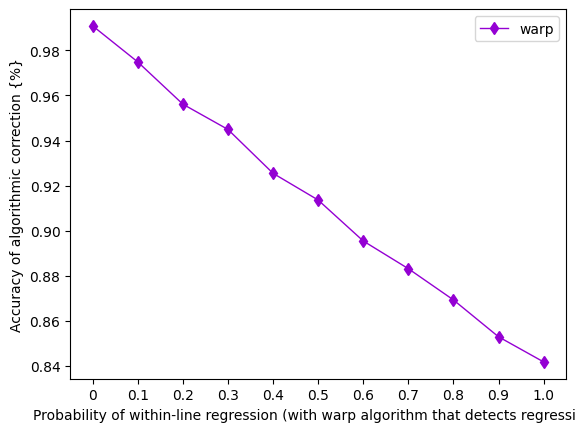

In [12]:
import matplotlib.pyplot as plt
plt.plot(mean_warp_within_line_results, color='DarkViolet', linewidth=1, marker='d')

plt.legend(['warp'])
plt.ylabel('Accuracy of algorithmic correction {%}')
plt.xlabel('Probability of within-line regression (with warp algorithm that detects regression))')

x_ticks_labels = ['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']
plt.xticks(range(0, 11), x_ticks_labels)
#plt.savefig("noise_comparison.png")
plt.show()

In [13]:
print("mean warp (within-line):", statistics.mean(mean_warp_within_line_results))

mean warp (within-line): 0.9135121135068321


## Warp Algorithm (With detection of regression) performance on between-line regression

In [16]:
warp_between_line_results = [[],[],[],[],[],[],[],[],[],[],[]]

import json

file = open('synthetic_dataset_with_time.txt', 'r')
text = file.read()
data = json.loads(text)

word_centers = correction.find_word_centers(aoi)
word_centers = np.array(word_centers.copy(), dtype=int)

duration_word_centers = correction.find_word_centers_and_duration(aois_with_tokens)
duration_word_centers = np.array(duration_word_centers.copy(), dtype=int)

image_path = "./"
image = "synthetic_text.png"
aoi_words = EMTK.find_aoi(image, image_path, level="sub-line")
aoi_lines = EMTK.find_aoi(image, image_path, level="line")

# Creating a sample lsit to store an array of an array of words where each index represents a line
words_sorted_by_line = []

for i in range(len(aoi_lines)):
    words_sorted_by_line.append([])

# Looping through the words and appending them to the correct line
for i in range(len(aoi_words)):
    word_line_number = int(aoi_words.at[i, 'name'].strip().split(' ')[1])
    # Appending the x and y coordinates of the word to the correct line
    words_sorted_by_line[word_line_number-1].append([aoi_words.at[i, 'x'], aoi_words.at[i, 'y']])

# MAKE SURE YOU RUN THIS 100 TIMES, NOT JUST ONE!!!
for robot_index in tqdm(range(100)):

    data_copy = data['robot' + str(robot_index)].copy()

    for error_probability in range(0, 11):

        data['robot' + str(robot_index)] = data_copy.copy()

        # generate within line regression error
        error_test, data['robot' + str(robot_index)] = correction.error_between_line_regression(error_probability/10, data['robot' + str(robot_index)].copy(), words_sorted_by_line, aoi_lines)
        
        # warp correction
        # np_array = np.array(error_test.copy(), dtype=int)
        # durations = np.delete(np_array, 0, 1)
        # durations = np.delete(durations, 0, 1)
        # np_array = np.delete(np_array, 2, 1)

        warp_correction, data['robot' + str(robot_index)] = algo.warp_with_regression(error_test.copy(), word_centers, words_sorted_by_line, aoi_lines, data['robot' + str(robot_index)].copy())
        
        percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), warp_correction)
        warp_between_line_results[error_probability].append(percentage)

        if percentage < 1:
            # correction.draw_correction('synthetic_text.png', warp_correction, match_list)
            print("robot:", robot_index, "    error probability:", error_probability)

/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colby/Spring 2023/CS421/CS421-project-cmg/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colby/Spring 2023/CS421/CS421-project-cmg/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colby/Spring 2023/CS421/CS421-project-cmg/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colb

robot: 0     error probability: 1
robot: 0     error probability: 2
robot: 0     error probability: 3
robot: 0     error probability: 4
robot: 0     error probability: 5
robot: 0     error probability: 6
robot: 0     error probability: 7
robot: 0     error probability: 8
robot: 0     error probability: 9
robot: 0     error probability: 10


  3%|▎         | 3/100 [00:02<01:19,  1.22it/s]

robot: 1     error probability: 1
robot: 1     error probability: 2
robot: 1     error probability: 3
robot: 1     error probability: 4
robot: 1     error probability: 5
robot: 1     error probability: 6
robot: 1     error probability: 7
robot: 1     error probability: 8
robot: 1     error probability: 9
robot: 1     error probability: 10
robot: 2     error probability: 1
robot: 2     error probability: 3
robot: 2     error probability: 4
robot: 2     error probability: 5
robot: 2     error probability: 6
robot: 2     error probability: 7
robot: 2     error probability: 8
robot: 2     error probability: 9
robot: 3     error probability: 1
robot: 3     error probability: 2
robot: 3     error probability: 3
robot: 3     error probability: 4
robot: 3     error probability: 5
robot: 3     error probability: 6
robot: 3     error probability: 7
robot: 3     error probability: 8


  4%|▍         | 4/100 [00:03<01:35,  1.00it/s]

robot: 3     error probability: 9
robot: 3     error probability: 10
robot: 4     error probability: 1
robot: 4     error probability: 2
robot: 4     error probability: 3
robot: 4     error probability: 4
robot: 4     error probability: 5
robot: 4     error probability: 6
robot: 4     error probability: 7
robot: 4     error probability: 8


  5%|▌         | 5/100 [00:04<01:32,  1.03it/s]

robot: 4     error probability: 9
robot: 4     error probability: 10
robot: 5     error probability: 1
robot: 5     error probability: 2
robot: 5     error probability: 3
robot: 5     error probability: 4
robot: 5     error probability: 5
robot: 5     error probability: 6
robot: 5     error probability: 7
robot: 5     error probability: 8
robot: 5     error probability: 9


  9%|▉         | 9/100 [00:07<01:16,  1.19it/s]

robot: 5     error probability: 10
robot: 6     error probability: 1
robot: 6     error probability: 2
robot: 6     error probability: 3
robot: 6     error probability: 4
robot: 6     error probability: 5
robot: 6     error probability: 6
robot: 6     error probability: 7
robot: 6     error probability: 8
robot: 6     error probability: 9
robot: 6     error probability: 10
robot: 7     error probability: 1
robot: 7     error probability: 2
robot: 7     error probability: 3
robot: 7     error probability: 4
robot: 7     error probability: 5
robot: 7     error probability: 6
robot: 7     error probability: 7
robot: 7     error probability: 8
robot: 7     error probability: 10
robot: 8     error probability: 1
robot: 8     error probability: 2
robot: 8     error probability: 3
robot: 8     error probability: 4
robot: 8     error probability: 5
robot: 8     error probability: 6
robot: 8     error probability: 8
robot: 8     error probability: 9
robot: 8     error probability: 10
robot: 9  

 10%|█         | 10/100 [00:08<01:20,  1.11it/s]

robot: 9     error probability: 7
robot: 9     error probability: 8
robot: 9     error probability: 9
robot: 9     error probability: 10
robot: 10     error probability: 1
robot: 10     error probability: 2
robot: 10     error probability: 3
robot: 10     error probability: 4
robot: 10     error probability: 6
robot: 10     error probability: 7
robot: 10     error probability: 8
robot: 10     error probability: 9
robot: 10     error probability: 10


 12%|█▏        | 12/100 [00:10<01:15,  1.17it/s]

robot: 11     error probability: 1
robot: 11     error probability: 2
robot: 11     error probability: 3
robot: 11     error probability: 4
robot: 11     error probability: 5
robot: 11     error probability: 6
robot: 11     error probability: 7
robot: 11     error probability: 8
robot: 11     error probability: 10
robot: 12     error probability: 0
robot: 12     error probability: 1
robot: 12     error probability: 2
robot: 12     error probability: 3
robot: 12     error probability: 4
robot: 12     error probability: 5
robot: 12     error probability: 6


 13%|█▎        | 13/100 [00:11<01:17,  1.12it/s]

robot: 12     error probability: 7
robot: 12     error probability: 8
robot: 12     error probability: 9
robot: 12     error probability: 10
robot: 13     error probability: 1
robot: 13     error probability: 3
robot: 13     error probability: 4
robot: 13     error probability: 5


 14%|█▍        | 14/100 [00:12<01:20,  1.07it/s]

robot: 13     error probability: 6
robot: 13     error probability: 7
robot: 13     error probability: 8
robot: 13     error probability: 9
robot: 13     error probability: 10
robot: 14     error probability: 1
robot: 14     error probability: 2
robot: 14     error probability: 3
robot: 14     error probability: 4
robot: 14     error probability: 5
robot: 14     error probability: 6
robot: 14     error probability: 7
robot: 14     error probability: 9


 16%|█▌        | 16/100 [00:14<01:12,  1.16it/s]

robot: 15     error probability: 1
robot: 15     error probability: 2
robot: 15     error probability: 3
robot: 15     error probability: 4
robot: 15     error probability: 5
robot: 15     error probability: 6
robot: 15     error probability: 8
robot: 15     error probability: 9
robot: 15     error probability: 10
robot: 16     error probability: 1
robot: 16     error probability: 2
robot: 16     error probability: 3
robot: 16     error probability: 4
robot: 16     error probability: 5
robot: 16     error probability: 6
robot: 16     error probability: 7
robot: 16     error probability: 8
robot: 16     error probability: 9


 17%|█▋        | 17/100 [00:15<01:12,  1.14it/s]

robot: 16     error probability: 10
robot: 17     error probability: 1
robot: 17     error probability: 2
robot: 17     error probability: 3
robot: 17     error probability: 5
robot: 17     error probability: 7


 19%|█▉        | 19/100 [00:16<01:10,  1.16it/s]

robot: 17     error probability: 8
robot: 17     error probability: 9
robot: 17     error probability: 10
robot: 18     error probability: 1
robot: 18     error probability: 2
robot: 18     error probability: 3
robot: 18     error probability: 5
robot: 18     error probability: 6
robot: 18     error probability: 7
robot: 18     error probability: 8
robot: 18     error probability: 9
robot: 18     error probability: 10


 21%|██        | 21/100 [00:18<01:08,  1.15it/s]

robot: 19     error probability: 1
robot: 19     error probability: 2
robot: 19     error probability: 3
robot: 19     error probability: 4
robot: 19     error probability: 5
robot: 19     error probability: 6
robot: 19     error probability: 7
robot: 19     error probability: 8
robot: 19     error probability: 9
robot: 19     error probability: 10
robot: 20     error probability: 1
robot: 20     error probability: 2
robot: 20     error probability: 4
robot: 20     error probability: 5
robot: 20     error probability: 6
robot: 20     error probability: 7
robot: 20     error probability: 8
robot: 20     error probability: 10


 22%|██▏       | 22/100 [00:19<01:05,  1.19it/s]

robot: 21     error probability: 1
robot: 21     error probability: 2
robot: 21     error probability: 3
robot: 21     error probability: 4
robot: 21     error probability: 5
robot: 21     error probability: 6
robot: 21     error probability: 7
robot: 21     error probability: 8
robot: 21     error probability: 9
robot: 21     error probability: 10
robot: 22     error probability: 1
robot: 22     error probability: 2
robot: 22     error probability: 3
robot: 22     error probability: 4
robot: 22     error probability: 5
robot: 22     error probability: 6
robot: 22     error probability: 7


 24%|██▍       | 24/100 [00:21<01:06,  1.15it/s]

robot: 22     error probability: 8
robot: 22     error probability: 9
robot: 22     error probability: 10
robot: 23     error probability: 1
robot: 23     error probability: 2
robot: 23     error probability: 3
robot: 23     error probability: 5
robot: 23     error probability: 7
robot: 23     error probability: 8
robot: 23     error probability: 9


 26%|██▌       | 26/100 [00:22<00:58,  1.27it/s]

robot: 24     error probability: 2
robot: 24     error probability: 4
robot: 24     error probability: 5
robot: 24     error probability: 6
robot: 24     error probability: 7
robot: 24     error probability: 9
robot: 24     error probability: 10
robot: 25     error probability: 1
robot: 25     error probability: 2
robot: 25     error probability: 3
robot: 25     error probability: 4
robot: 25     error probability: 5
robot: 25     error probability: 6
robot: 25     error probability: 7
robot: 25     error probability: 8
robot: 25     error probability: 9
robot: 25     error probability: 10


 27%|██▋       | 27/100 [00:23<00:58,  1.26it/s]

robot: 26     error probability: 1
robot: 26     error probability: 2
robot: 26     error probability: 3
robot: 26     error probability: 4
robot: 26     error probability: 5
robot: 26     error probability: 6
robot: 26     error probability: 8
robot: 26     error probability: 9
robot: 26     error probability: 10
robot: 27     error probability: 1
robot: 27     error probability: 2
robot: 27     error probability: 3
robot: 27     error probability: 4
robot: 27     error probability: 5
robot: 27     error probability: 6
robot: 27     error probability: 7


 28%|██▊       | 28/100 [00:24<01:00,  1.18it/s]

robot: 27     error probability: 8
robot: 27     error probability: 9
robot: 27     error probability: 10
robot: 28     error probability: 0
robot: 28     error probability: 1
robot: 28     error probability: 2
robot: 28     error probability: 3
robot: 28     error probability: 4
robot: 28     error probability: 5
robot: 28     error probability: 6
robot: 28     error probability: 7
robot: 28     error probability: 8
robot: 28     error probability: 9
robot: 28     error probability: 10


 29%|██▉       | 29/100 [00:25<00:59,  1.20it/s]

robot: 29     error probability: 2
robot: 29     error probability: 3
robot: 29     error probability: 4
robot: 29     error probability: 6


 30%|███       | 30/100 [00:25<00:58,  1.21it/s]

robot: 29     error probability: 7
robot: 29     error probability: 8
robot: 29     error probability: 9
robot: 29     error probability: 10
robot: 30     error probability: 1
robot: 30     error probability: 2
robot: 30     error probability: 3
robot: 30     error probability: 4
robot: 30     error probability: 5
robot: 30     error probability: 6
robot: 30     error probability: 7
robot: 30     error probability: 8
robot: 30     error probability: 9


 31%|███       | 31/100 [00:26<00:55,  1.24it/s]

robot: 31     error probability: 1
robot: 31     error probability: 2
robot: 31     error probability: 3
robot: 31     error probability: 4
robot: 31     error probability: 5
robot: 31     error probability: 6
robot: 31     error probability: 7
robot: 31     error probability: 8
robot: 31     error probability: 10


 33%|███▎      | 33/100 [00:28<00:53,  1.26it/s]

robot: 32     error probability: 2
robot: 32     error probability: 3
robot: 32     error probability: 4
robot: 32     error probability: 5
robot: 32     error probability: 6
robot: 32     error probability: 7
robot: 32     error probability: 8
robot: 32     error probability: 9
robot: 33     error probability: 2
robot: 33     error probability: 3
robot: 33     error probability: 4
robot: 33     error probability: 5
robot: 33     error probability: 6
robot: 33     error probability: 7
robot: 33     error probability: 8
robot: 33     error probability: 9


 34%|███▍      | 34/100 [00:29<00:51,  1.27it/s]

robot: 33     error probability: 10
robot: 34     error probability: 1
robot: 34     error probability: 2
robot: 34     error probability: 3
robot: 34     error probability: 4
robot: 34     error probability: 5


 35%|███▌      | 35/100 [00:30<00:57,  1.14it/s]

robot: 34     error probability: 6
robot: 34     error probability: 7
robot: 34     error probability: 8
robot: 34     error probability: 9
robot: 34     error probability: 10
robot: 35     error probability: 1
robot: 35     error probability: 2
robot: 35     error probability: 3
robot: 35     error probability: 4
robot: 35     error probability: 5
robot: 35     error probability: 6
robot: 35     error probability: 7
robot: 35     error probability: 8
robot: 35     error probability: 9
robot: 35     error probability: 10


 36%|███▌      | 36/100 [00:31<00:55,  1.14it/s]

robot: 36     error probability: 1
robot: 36     error probability: 2
robot: 36     error probability: 4
robot: 36     error probability: 5


 37%|███▋      | 37/100 [00:31<00:52,  1.20it/s]

robot: 36     error probability: 6
robot: 36     error probability: 8
robot: 36     error probability: 9
robot: 36     error probability: 10
robot: 37     error probability: 0
robot: 37     error probability: 1
robot: 37     error probability: 2
robot: 37     error probability: 3
robot: 37     error probability: 4
robot: 37     error probability: 5
robot: 37     error probability: 6
robot: 37     error probability: 7
robot: 37     error probability: 8
robot: 37     error probability: 9
robot: 37     error probability: 10


 38%|███▊      | 38/100 [00:32<00:53,  1.15it/s]

robot: 38     error probability: 1
robot: 38     error probability: 2
robot: 38     error probability: 3
robot: 38     error probability: 4
robot: 38     error probability: 5
robot: 38     error probability: 6


 39%|███▉      | 39/100 [00:33<00:51,  1.18it/s]

robot: 38     error probability: 7
robot: 38     error probability: 8
robot: 38     error probability: 9
robot: 38     error probability: 10
robot: 39     error probability: 1
robot: 39     error probability: 2
robot: 39     error probability: 3
robot: 39     error probability: 4
robot: 39     error probability: 5
robot: 39     error probability: 6
robot: 39     error probability: 8
robot: 39     error probability: 9
robot: 39     error probability: 10


 40%|████      | 40/100 [00:34<00:51,  1.16it/s]

robot: 40     error probability: 1
robot: 40     error probability: 2
robot: 40     error probability: 3
robot: 40     error probability: 4


 41%|████      | 41/100 [00:35<00:50,  1.16it/s]

robot: 40     error probability: 5
robot: 40     error probability: 6
robot: 40     error probability: 7
robot: 40     error probability: 8
robot: 40     error probability: 9
robot: 40     error probability: 10
robot: 41     error probability: 1
robot: 41     error probability: 2
robot: 41     error probability: 3
robot: 41     error probability: 4
robot: 41     error probability: 5
robot: 41     error probability: 7
robot: 41     error probability: 8
robot: 41     error probability: 9
robot: 41     error probability: 10


 43%|████▎     | 43/100 [00:36<00:48,  1.17it/s]

robot: 42     error probability: 1
robot: 42     error probability: 3
robot: 42     error probability: 4
robot: 42     error probability: 6
robot: 42     error probability: 7
robot: 42     error probability: 8
robot: 42     error probability: 9
robot: 42     error probability: 10
robot: 43     error probability: 1
robot: 43     error probability: 2
robot: 43     error probability: 3
robot: 43     error probability: 4
robot: 43     error probability: 5
robot: 43     error probability: 6
robot: 43     error probability: 8
robot: 43     error probability: 9


 44%|████▍     | 44/100 [00:37<00:49,  1.14it/s]

robot: 43     error probability: 10
robot: 44     error probability: 1
robot: 44     error probability: 2


 45%|████▌     | 45/100 [00:38<00:46,  1.18it/s]

robot: 44     error probability: 3
robot: 44     error probability: 5
robot: 44     error probability: 6
robot: 44     error probability: 7
robot: 44     error probability: 8
robot: 44     error probability: 10
robot: 45     error probability: 1
robot: 45     error probability: 2
robot: 45     error probability: 3
robot: 45     error probability: 4
robot: 45     error probability: 5
robot: 45     error probability: 6
robot: 45     error probability: 7


 46%|████▌     | 46/100 [00:39<00:46,  1.15it/s]

robot: 45     error probability: 8
robot: 45     error probability: 9
robot: 45     error probability: 10
robot: 46     error probability: 1
robot: 46     error probability: 2
robot: 46     error probability: 4
robot: 46     error probability: 6
robot: 46     error probability: 7
robot: 46     error probability: 9
robot: 46     error probability: 10


 47%|████▋     | 47/100 [00:40<00:45,  1.17it/s]

robot: 47     error probability: 1
robot: 47     error probability: 2
robot: 47     error probability: 3
robot: 47     error probability: 4
robot: 47     error probability: 5


 49%|████▉     | 49/100 [00:42<00:43,  1.16it/s]

robot: 47     error probability: 6
robot: 47     error probability: 7
robot: 47     error probability: 8
robot: 47     error probability: 9
robot: 47     error probability: 10
robot: 48     error probability: 1
robot: 48     error probability: 2
robot: 48     error probability: 3
robot: 48     error probability: 4
robot: 48     error probability: 5
robot: 48     error probability: 6
robot: 48     error probability: 7
robot: 48     error probability: 8
robot: 48     error probability: 9
robot: 48     error probability: 10


 51%|█████     | 51/100 [00:43<00:37,  1.29it/s]

robot: 49     error probability: 1
robot: 49     error probability: 2
robot: 49     error probability: 3
robot: 49     error probability: 4
robot: 49     error probability: 6
robot: 49     error probability: 7
robot: 49     error probability: 8
robot: 49     error probability: 9
robot: 49     error probability: 10
robot: 50     error probability: 1
robot: 50     error probability: 2
robot: 50     error probability: 3
robot: 50     error probability: 5
robot: 50     error probability: 6
robot: 50     error probability: 8
robot: 50     error probability: 9
robot: 50     error probability: 10


 53%|█████▎    | 53/100 [00:44<00:35,  1.33it/s]

robot: 51     error probability: 1
robot: 51     error probability: 2
robot: 51     error probability: 3
robot: 51     error probability: 4
robot: 51     error probability: 5
robot: 51     error probability: 6
robot: 51     error probability: 7
robot: 51     error probability: 9
robot: 51     error probability: 10
robot: 52     error probability: 2
robot: 52     error probability: 3
robot: 52     error probability: 4
robot: 52     error probability: 6
robot: 52     error probability: 7
robot: 52     error probability: 8
robot: 52     error probability: 9
robot: 52     error probability: 10


 54%|█████▍    | 54/100 [00:45<00:36,  1.25it/s]

robot: 53     error probability: 1
robot: 53     error probability: 3
robot: 53     error probability: 4
robot: 53     error probability: 5
robot: 53     error probability: 6
robot: 53     error probability: 7
robot: 53     error probability: 8
robot: 53     error probability: 9
robot: 53     error probability: 10
robot: 54     error probability: 2
robot: 54     error probability: 3
robot: 54     error probability: 4
robot: 54     error probability: 5
robot: 54     error probability: 6
robot: 54     error probability: 7
robot: 54     error probability: 8
robot: 54     error probability: 9
robot: 54     error probability: 10


 56%|█████▌    | 56/100 [00:47<00:35,  1.26it/s]

robot: 55     error probability: 2
robot: 55     error probability: 3
robot: 55     error probability: 4
robot: 55     error probability: 5
robot: 55     error probability: 6
robot: 55     error probability: 7
robot: 55     error probability: 8
robot: 55     error probability: 9
robot: 55     error probability: 10
robot: 56     error probability: 1
robot: 56     error probability: 2
robot: 56     error probability: 4
robot: 56     error probability: 5
robot: 56     error probability: 6
robot: 56     error probability: 7
robot: 56     error probability: 8
robot: 56     error probability: 9
robot: 56     error probability: 10


 59%|█████▉    | 59/100 [00:49<00:33,  1.24it/s]

robot: 57     error probability: 1
robot: 57     error probability: 4
robot: 57     error probability: 6
robot: 57     error probability: 7
robot: 57     error probability: 8
robot: 57     error probability: 9
robot: 57     error probability: 10
robot: 58     error probability: 1
robot: 58     error probability: 2
robot: 58     error probability: 3
robot: 58     error probability: 4
robot: 58     error probability: 5
robot: 58     error probability: 6
robot: 58     error probability: 7
robot: 58     error probability: 8
robot: 58     error probability: 9
robot: 58     error probability: 10


 60%|██████    | 60/100 [00:50<00:32,  1.22it/s]

robot: 59     error probability: 1
robot: 59     error probability: 2
robot: 59     error probability: 3
robot: 59     error probability: 4
robot: 59     error probability: 5
robot: 59     error probability: 6
robot: 59     error probability: 7
robot: 59     error probability: 9
robot: 59     error probability: 10
robot: 60     error probability: 1
robot: 60     error probability: 2
robot: 60     error probability: 3
robot: 60     error probability: 5
robot: 60     error probability: 6
robot: 60     error probability: 7
robot: 60     error probability: 8
robot: 60     error probability: 9
robot: 60     error probability: 10


 61%|██████    | 61/100 [00:51<00:31,  1.22it/s]

robot: 61     error probability: 1
robot: 61     error probability: 2
robot: 61     error probability: 4
robot: 61     error probability: 5
robot: 61     error probability: 6
robot: 61     error probability: 7
robot: 61     error probability: 8
robot: 61     error probability: 9


 62%|██████▏   | 62/100 [00:52<00:34,  1.11it/s]

robot: 61     error probability: 10
robot: 62     error probability: 1
robot: 62     error probability: 2
robot: 62     error probability: 3
robot: 62     error probability: 4
robot: 62     error probability: 5


 63%|██████▎   | 63/100 [00:53<00:34,  1.07it/s]

robot: 62     error probability: 6
robot: 62     error probability: 7
robot: 62     error probability: 9
robot: 62     error probability: 10
robot: 63     error probability: 2
robot: 63     error probability: 3
robot: 63     error probability: 4
robot: 63     error probability: 5
robot: 63     error probability: 6
robot: 63     error probability: 7
robot: 63     error probability: 8
robot: 63     error probability: 9
robot: 63     error probability: 10


 64%|██████▍   | 64/100 [00:54<00:33,  1.09it/s]

robot: 64     error probability: 1
robot: 64     error probability: 2
robot: 64     error probability: 3
robot: 64     error probability: 4
robot: 64     error probability: 5
robot: 64     error probability: 6
robot: 64     error probability: 7
robot: 64     error probability: 8


 66%|██████▌   | 66/100 [00:56<00:29,  1.15it/s]

robot: 64     error probability: 9
robot: 64     error probability: 10
robot: 65     error probability: 1
robot: 65     error probability: 2
robot: 65     error probability: 3
robot: 65     error probability: 4
robot: 65     error probability: 5
robot: 65     error probability: 6
robot: 65     error probability: 7
robot: 65     error probability: 8
robot: 65     error probability: 9
robot: 65     error probability: 10


 67%|██████▋   | 67/100 [00:57<00:28,  1.17it/s]

robot: 66     error probability: 1
robot: 66     error probability: 2
robot: 66     error probability: 3
robot: 66     error probability: 4
robot: 66     error probability: 5
robot: 66     error probability: 6
robot: 66     error probability: 7
robot: 66     error probability: 8
robot: 66     error probability: 9
robot: 67     error probability: 1
robot: 67     error probability: 2
robot: 67     error probability: 3
robot: 67     error probability: 4
robot: 67     error probability: 5
robot: 67     error probability: 6
robot: 67     error probability: 7
robot: 67     error probability: 8


 68%|██████▊   | 68/100 [00:57<00:27,  1.15it/s]

robot: 67     error probability: 9
robot: 68     error probability: 1
robot: 68     error probability: 2
robot: 68     error probability: 3
robot: 68     error probability: 4
robot: 68     error probability: 5
robot: 68     error probability: 6
robot: 68     error probability: 7
robot: 68     error probability: 8
robot: 68     error probability: 9
robot: 68     error probability: 10


 70%|███████   | 70/100 [00:59<00:25,  1.20it/s]

robot: 69     error probability: 1
robot: 69     error probability: 2
robot: 69     error probability: 4
robot: 69     error probability: 5
robot: 69     error probability: 6
robot: 69     error probability: 7
robot: 69     error probability: 8
robot: 69     error probability: 9
robot: 69     error probability: 10


 71%|███████   | 71/100 [01:00<00:24,  1.20it/s]

robot: 70     error probability: 1
robot: 70     error probability: 2
robot: 70     error probability: 3
robot: 70     error probability: 4
robot: 70     error probability: 5
robot: 70     error probability: 6
robot: 70     error probability: 7
robot: 70     error probability: 8
robot: 70     error probability: 9
robot: 70     error probability: 10
robot: 71     error probability: 2
robot: 71     error probability: 3
robot: 71     error probability: 4
robot: 71     error probability: 5
robot: 71     error probability: 6
robot: 71     error probability: 8
robot: 71     error probability: 9
robot: 71     error probability: 10


 72%|███████▏  | 72/100 [01:01<00:23,  1.21it/s]

robot: 72     error probability: 2
robot: 72     error probability: 3
robot: 72     error probability: 4
robot: 72     error probability: 5
robot: 72     error probability: 6
robot: 72     error probability: 7
robot: 72     error probability: 8
robot: 72     error probability: 9
robot: 72     error probability: 10


 74%|███████▍  | 74/100 [01:02<00:21,  1.23it/s]

robot: 73     error probability: 1
robot: 73     error probability: 2
robot: 73     error probability: 3
robot: 73     error probability: 5
robot: 73     error probability: 7
robot: 73     error probability: 8
robot: 73     error probability: 9
robot: 73     error probability: 10
robot: 74     error probability: 0
robot: 74     error probability: 1
robot: 74     error probability: 2
robot: 74     error probability: 3
robot: 74     error probability: 4
robot: 74     error probability: 5
robot: 74     error probability: 6
robot: 74     error probability: 7
robot: 74     error probability: 8
robot: 74     error probability: 9
robot: 74     error probability: 10


 75%|███████▌  | 75/100 [01:03<00:20,  1.22it/s]

robot: 75     error probability: 0
robot: 75     error probability: 1
robot: 75     error probability: 2
robot: 75     error probability: 3
robot: 75     error probability: 4
robot: 75     error probability: 5
robot: 75     error probability: 6
robot: 75     error probability: 7


 77%|███████▋  | 77/100 [01:05<00:18,  1.24it/s]

robot: 75     error probability: 8
robot: 75     error probability: 9
robot: 75     error probability: 10
robot: 76     error probability: 1
robot: 76     error probability: 2
robot: 76     error probability: 3
robot: 76     error probability: 4
robot: 76     error probability: 5
robot: 76     error probability: 6
robot: 76     error probability: 7
robot: 76     error probability: 8
robot: 76     error probability: 9
robot: 76     error probability: 10
robot: 77     error probability: 0
robot: 77     error probability: 1
robot: 77     error probability: 2
robot: 77     error probability: 3
robot: 77     error probability: 4
robot: 77     error probability: 5
robot: 77     error probability: 6


 79%|███████▉  | 79/100 [01:07<00:19,  1.09it/s]

robot: 77     error probability: 7
robot: 77     error probability: 8
robot: 77     error probability: 9
robot: 77     error probability: 10
robot: 78     error probability: 1
robot: 78     error probability: 2
robot: 78     error probability: 3
robot: 78     error probability: 4
robot: 78     error probability: 5
robot: 78     error probability: 6
robot: 78     error probability: 7
robot: 78     error probability: 8
robot: 78     error probability: 9
robot: 78     error probability: 10


 80%|████████  | 80/100 [01:08<00:17,  1.11it/s]

robot: 79     error probability: 0
robot: 79     error probability: 1
robot: 79     error probability: 2
robot: 79     error probability: 4
robot: 79     error probability: 5
robot: 79     error probability: 6
robot: 79     error probability: 7
robot: 79     error probability: 8
robot: 79     error probability: 9
robot: 79     error probability: 10
robot: 80     error probability: 1
robot: 80     error probability: 2
robot: 80     error probability: 3
robot: 80     error probability: 4
robot: 80     error probability: 5
robot: 80     error probability: 6
robot: 80     error probability: 7
robot: 80     error probability: 8


 81%|████████  | 81/100 [01:09<00:19,  1.01s/it]

robot: 80     error probability: 9
robot: 80     error probability: 10
robot: 81     error probability: 1
robot: 81     error probability: 2
robot: 81     error probability: 4
robot: 81     error probability: 5
robot: 81     error probability: 6
robot: 81     error probability: 7
robot: 81     error probability: 8
robot: 81     error probability: 9
robot: 81     error probability: 10


 83%|████████▎ | 83/100 [01:11<00:15,  1.11it/s]

robot: 82     error probability: 1
robot: 82     error probability: 3
robot: 82     error probability: 4
robot: 82     error probability: 5
robot: 82     error probability: 6
robot: 82     error probability: 7
robot: 82     error probability: 8
robot: 82     error probability: 9
robot: 82     error probability: 10
robot: 83     error probability: 1
robot: 83     error probability: 2


 85%|████████▌ | 85/100 [01:12<00:12,  1.17it/s]

robot: 83     error probability: 3
robot: 83     error probability: 4
robot: 83     error probability: 5
robot: 83     error probability: 6
robot: 83     error probability: 7
robot: 83     error probability: 8
robot: 83     error probability: 9
robot: 83     error probability: 10
robot: 84     error probability: 0
robot: 84     error probability: 1
robot: 84     error probability: 2
robot: 84     error probability: 3
robot: 84     error probability: 4
robot: 84     error probability: 5
robot: 84     error probability: 6
robot: 84     error probability: 7
robot: 84     error probability: 8
robot: 84     error probability: 9
robot: 84     error probability: 10


 86%|████████▌ | 86/100 [01:13<00:11,  1.19it/s]

robot: 85     error probability: 0
robot: 85     error probability: 1
robot: 85     error probability: 2
robot: 85     error probability: 3
robot: 85     error probability: 4
robot: 85     error probability: 5
robot: 85     error probability: 6
robot: 85     error probability: 7
robot: 85     error probability: 8
robot: 85     error probability: 9
robot: 85     error probability: 10
robot: 86     error probability: 1
robot: 86     error probability: 2
robot: 86     error probability: 3
robot: 86     error probability: 4
robot: 86     error probability: 5
robot: 86     error probability: 6
robot: 86     error probability: 7
robot: 86     error probability: 8


 88%|████████▊ | 88/100 [01:15<00:09,  1.20it/s]

robot: 86     error probability: 9
robot: 86     error probability: 10
robot: 87     error probability: 2
robot: 87     error probability: 3
robot: 87     error probability: 4
robot: 87     error probability: 5
robot: 87     error probability: 6
robot: 87     error probability: 7
robot: 87     error probability: 8
robot: 87     error probability: 9
robot: 87     error probability: 10


 89%|████████▉ | 89/100 [01:15<00:08,  1.26it/s]

robot: 88     error probability: 1
robot: 88     error probability: 2
robot: 88     error probability: 3
robot: 88     error probability: 5
robot: 88     error probability: 6
robot: 88     error probability: 7
robot: 88     error probability: 8
robot: 88     error probability: 9
robot: 89     error probability: 1
robot: 89     error probability: 2
robot: 89     error probability: 3
robot: 89     error probability: 4
robot: 89     error probability: 5
robot: 89     error probability: 6
robot: 89     error probability: 7
robot: 89     error probability: 8
robot: 89     error probability: 9


 90%|█████████ | 90/100 [01:17<00:09,  1.08it/s]

robot: 89     error probability: 10
robot: 90     error probability: 1


 91%|█████████ | 91/100 [01:17<00:07,  1.13it/s]

robot: 90     error probability: 3
robot: 90     error probability: 5
robot: 90     error probability: 6
robot: 90     error probability: 7
robot: 90     error probability: 8
robot: 90     error probability: 9
robot: 90     error probability: 10
robot: 91     error probability: 3
robot: 91     error probability: 5
robot: 91     error probability: 6
robot: 91     error probability: 7
robot: 91     error probability: 8
robot: 91     error probability: 9
robot: 91     error probability: 10


 92%|█████████▏| 92/100 [01:18<00:06,  1.17it/s]

robot: 92     error probability: 2
robot: 92     error probability: 4
robot: 92     error probability: 5
robot: 92     error probability: 6
robot: 92     error probability: 8
robot: 92     error probability: 9


 93%|█████████▎| 93/100 [01:19<00:06,  1.16it/s]

robot: 92     error probability: 10
robot: 93     error probability: 1
robot: 93     error probability: 2
robot: 93     error probability: 3
robot: 93     error probability: 4
robot: 93     error probability: 5
robot: 93     error probability: 6
robot: 93     error probability: 7
robot: 93     error probability: 8
robot: 93     error probability: 9
robot: 93     error probability: 10


 94%|█████████▍| 94/100 [01:20<00:05,  1.18it/s]

robot: 94     error probability: 1
robot: 94     error probability: 2
robot: 94     error probability: 4


 95%|█████████▌| 95/100 [01:21<00:04,  1.10it/s]

robot: 94     error probability: 5
robot: 94     error probability: 6
robot: 94     error probability: 7
robot: 94     error probability: 8
robot: 94     error probability: 9
robot: 94     error probability: 10
robot: 95     error probability: 2
robot: 95     error probability: 3
robot: 95     error probability: 4
robot: 95     error probability: 5
robot: 95     error probability: 6
robot: 95     error probability: 7
robot: 95     error probability: 8
robot: 95     error probability: 9
robot: 95     error probability: 10


 96%|█████████▌| 96/100 [01:22<00:03,  1.15it/s]

robot: 96     error probability: 1
robot: 96     error probability: 2
robot: 96     error probability: 3
robot: 96     error probability: 4
robot: 96     error probability: 5
robot: 96     error probability: 6
robot: 96     error probability: 7


 97%|█████████▋| 97/100 [01:23<00:02,  1.15it/s]

robot: 96     error probability: 8
robot: 96     error probability: 9
robot: 96     error probability: 10
robot: 97     error probability: 1
robot: 97     error probability: 2
robot: 97     error probability: 3
robot: 97     error probability: 4
robot: 97     error probability: 5
robot: 97     error probability: 6
robot: 97     error probability: 7
robot: 97     error probability: 8
robot: 97     error probability: 9
robot: 97     error probability: 10


 98%|█████████▊| 98/100 [01:23<00:01,  1.20it/s]

robot: 98     error probability: 1
robot: 98     error probability: 2
robot: 98     error probability: 3
robot: 98     error probability: 4
robot: 98     error probability: 5


 99%|█████████▉| 99/100 [01:24<00:00,  1.20it/s]

robot: 98     error probability: 6
robot: 98     error probability: 8
robot: 98     error probability: 9
robot: 98     error probability: 10
robot: 99     error probability: 1
robot: 99     error probability: 2
robot: 99     error probability: 3
robot: 99     error probability: 4
robot: 99     error probability: 5
robot: 99     error probability: 6
robot: 99     error probability: 7
robot: 99     error probability: 8
robot: 99     error probability: 9
robot: 99     error probability: 10


100%|██████████| 100/100 [01:25<00:00,  1.17it/s]


In [17]:
mean_warp_between_line_results = mean_error_group(warp_between_line_results)

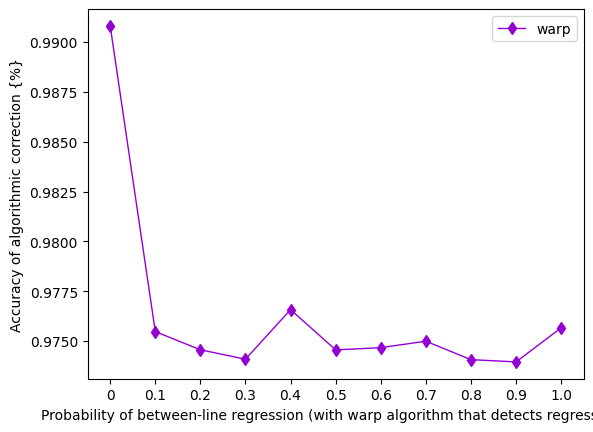

In [18]:
import matplotlib.pyplot as plt
plt.plot(mean_warp_between_line_results, color='DarkViolet', linewidth=1, marker='d')

plt.legend(['warp'])
plt.ylabel('Accuracy of algorithmic correction {%}')
plt.xlabel('Probability of between-line regression (with warp algorithm that detects regression))')

x_ticks_labels = ['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']
plt.xticks(range(0, 11), x_ticks_labels)
#plt.savefig("noise_comparison.png")
plt.show()

In [19]:
print("mean warp (between-line):", statistics.mean(mean_warp_between_line_results))

mean warp (between-line): 0.9763098058113481
